# **NY Dog Bite Analysis Project**

#### Comprehensive data analysis of dog bite incidents using NYC Open Data via Kaggle dataset and coding platform.

#### Processe and analyze 10K+ records spanning 2015 through 2021 from the New York City's Department of Health and Mental Hygiene. Focused on exploring and manipulating the data to uncover key trends and insights. Provided brief, data-driven insights throughout the analysis, highlighting significant patterns and anomalies. The customized visualizations were designed to effectively communicate findings and support public health initiatives.

# **Data**

#### The following section of code is standard when using the Kaggle platform's Jupyter notebook.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-bites-nyc/Dog_Bites_Data.csv
/kaggle/input/dog-bites-nyc/NYC_Dog_Licensing_Dataset.csv
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.prj
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.shp
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.dbf
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.shp.xml
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.sbn
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.sbx
/kaggle/input/dog-bites-nyc/ZIP_CODE_040114/ZIP_CODE_040114.shx


#### Even though there are other files associated with this dataset, this analysis will focus solely on the 'Dog_Bites_Data'. 

### Now to install additional libraries and packages

In [4]:
#!pip install yellowbrick  # To use costume color palletes with color hex codes. Code disabled after initial install

# Importing the Plotting libraries
import matplotlib.pyplot as plt # Basic plotting 
import seaborn as sns           # Statistical data visualization
import plotly.express as px     # Interactive plotting
from yellowbrick.style import set_palette  # Machine learning visualizing tool. Also for custom color palettes
from matplotlib.lines import Line2D        # Creating custom lines in plots

In [5]:
# Reading the Dog Bites data set
df = pd.read_csv('/kaggle/input/dog-bites-nyc/Dog_Bites_Data.csv')

# **Cleaning and preparing data**

In [6]:
# Quick glimpse of data
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224


#### From this glimpse of the data we can already see that are 'null' and 'unknown' values. Date is also in a format that will change to make working with date easier.

In [7]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    22663 non-null  int64 
 1   DateOfBite  22663 non-null  object
 2   Species     22663 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11442 non-null  object
 5   Gender      22663 non-null  object
 6   SpayNeuter  22663 non-null  bool  
 7   Borough     22663 non-null  object
 8   ZipCode     16805 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


#### Majority of the data types ('Dtype') are not defined.  Data types will be set later in the analysis; this will prevent any possible data errors when doing any type of calculations.

## Null Values

In [8]:
# Checking null values in the columns
df.isnull().sum()

UniqueID          0
DateOfBite        0
Species           0
Breed          2218
Age           11221
Gender            0
SpayNeuter        0
Borough           0
ZipCode        5858
dtype: int64

#### Want to keep the rows that contain 'NaN' values in the Age column. Removing the NaN rows would remove at least half of the dataset. That and a dogs age may not have been known at time of bite. The Breed column will be focused on later.

In [9]:
# Replace 'NaN' values in 'Age' column with '0'
df['Age'].fillna('0', inplace=True)
df.head() # Viewing the dataframe to see results of replacing NaN values

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,0,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,0,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224


In [10]:
# I've chosen to drop null values from Breed and ZipCode columns
df.dropna(subset=['Breed', 'ZipCode'], inplace=True)

#### Now to recheck the dataframe to ensure 'null' values were removed.

In [11]:
# Now to recheck for Null values
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

## Duplicates

In [12]:
# Check for duplicates in a specific column
IdDups = df.duplicated('UniqueID')
# Prints the status of duplicates within in the 'UniqueID' column
if IdDups.any():
    print("\nThere are duplicates in the UniqueID column.")
else:
    print("\nNo duplicates found in the UniqueID column.")


There are duplicates in the UniqueID column.


In [13]:
# Remove duplicates from the 'UniqueID' column, keeping the first occurrence
df = df.drop_duplicates(subset=['UniqueID'])

#### Recheck the UniqueID field for duplicates

In [14]:
# Check for duplicates in a specific column
IdDups2 = df.duplicated('UniqueID')
# Check if there are any duplicates in the column
if IdDups2.any():
    print("\nThere are duplicates in the UniqueID column.")
else:
    print("\nNo duplicates found in the UniqueID column.")


No duplicates found in the UniqueID column.


In [15]:
# Another glimpse of the dataset after first stages of cleaning the data
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,0,U,False,Brooklyn,11220
2,3,January 06 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,0,U,False,Brooklyn,11224
5,6,January 03 2018,DOG,BASENJI,4Y,M,False,Brooklyn,11231


## Data Types
#### Now to change data types and adjust some values to make analysis easier. 
#### Make sure the 'ZipCode' is in a number format and no non-numeric values are present

#### Zipcode:

In [16]:
# Replace non-numeric values with NaN
df['ZipCode'] = pd.to_numeric(df['ZipCode'], errors='coerce')

# Convert the 'zipcode' column to int64
df['ZipCode'] = df['ZipCode'].astype('Int64')

#### Format the 'DateOfBite' Column

In [17]:
# Will change the current date format into one that is yyyy-mm-dd
df['DateOfBite'] = pd.to_datetime(df['DateOfBite'])

#### Spay/Neuter column adjusted to something simplier but still maintaining the True/False format

In [18]:
# For the 'SpayNeuter' column, let's change the vaules to 'Y' for True and 'N' for False. 
df['SpayNeuter'] = df['SpayNeuter'].map({True: 'Y', False: 'N'})

#### Now for the 'Age' column.  From the above df table, some enteries contain 'Y' after the number, this will need to be removed so that 'Age' value is an integer.

In [19]:
# Convert the 'Age' column to string and remove 'Y'
df['Age'] = df['Age'].astype(str).str.replace('Y', '', regex=False)

# Convert the 'Age' column numbers and handle any errors that may occur
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Replace or drop invalid values with NaN
df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

# Now to convert values to integers and replace any NaN values with -1 to filter out later
df['Age'] = df['Age'].fillna(-1).astype(int)

In [20]:
# See all the unique ages of the 'Age' column
unique_age = sorted(df['Age'].unique())
unique_age # Displays the output

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]

#### From our previous section of code dealing with formating the 'Ages' we can see that there were NaN values as shown by '-1'

### What breed of dog, along with it's gender, has managed to make it to 20 years old?

In [21]:
# What Breed of dog and gender has managed to make it to 20
old_dog = df.loc[df['Age'] == 20, ['Breed', 'Gender']]
old_dog

,Breed,Gender
5853,TERRIER MIX,M


#### Now to set the 'category' data types for the non-numeric values

In [22]:
# Set Category data types for non-numeric values
df[['Species','Breed','Gender', 'SpayNeuter','Borough']]= df[['Species','Breed',
                           'Gender', 'SpayNeuter','Borough']].astype('category')

# Fine Tuning the Data
#### Breaking down the 'DateOfBite' column further to aid in analysis.  This will create columns for month & year that bite occured

In [23]:
# One more date change to help with analysis. Will separate the parts of the dates to obtain the months and years

# Extract the month from the Bite Date column
df['BiteMonth'] = df['DateOfBite'].dt.month

#Extract the year from the Bite Date column
df['BiteYear'] = df['DateOfBite'].dt.year

In [24]:
# Viewing first 10 rows of revised table
df.head(10)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,1,2018-01-01,DOG,UNKNOWN,0,U,N,Brooklyn,11220,1,2018
2,3,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,4,2018-01-08,DOG,Mixed/Other,4,M,N,Brooklyn,11231,1,2018
4,5,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
5,6,2018-01-03,DOG,BASENJI,4,M,N,Brooklyn,11231,1,2018
7,8,2018-01-03,DOG,Pit Bull,0,U,N,Brooklyn,11233,1,2018
8,9,2018-01-04,DOG,American Pit Bull Mix / Pit Bull Mix,5,M,N,Brooklyn,11235,1,2018
9,10,2018-01-10,DOG,MIXED,3,F,N,Brooklyn,11208,1,2018
11,12,2018-01-07,DOG,Yorkshire Terrier Crossbreed,7,M,Y,Brooklyn,11208,1,2018
13,14,2018-01-01,DOG,Pit Bull,0,U,N,Brooklyn,11220,1,2018


In [25]:
# Shows that number values have the corrected data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10773 entries, 0 to 22647
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UniqueID    10773 non-null  int64         
 1   DateOfBite  10773 non-null  datetime64[ns]
 2   Species     10773 non-null  category      
 3   Breed       10773 non-null  category      
 4   Age         10773 non-null  int64         
 5   Gender      10773 non-null  category      
 6   SpayNeuter  10773 non-null  category      
 7   Borough     10773 non-null  category      
 8   ZipCode     10772 non-null  Int64         
 9   BiteMonth   10773 non-null  int32         
 10  BiteYear    10773 non-null  int32         
dtypes: Int64(1), category(5), datetime64[ns](1), int32(2), int64(2)
memory usage: 619.4 KB


In [26]:
# Count unique values in each column
df.nunique()

UniqueID      10773
DateOfBite     2331
Species           1
Breed          1010
Age              21
Gender            3
SpayNeuter        2
Borough           6
ZipCode         428
BiteMonth        12
BiteYear          7
dtype: int64

### Key points that the unique values are showing us? 
<ul>
    <li> UniqueID - there are a total 10773 dogs in the study</li>
    <li> DateOfBite - 2331 dates that bites took place.</li>
    <li> Species - Only 1 species present in the data/study</li>
    <li> Breed - We have 1010 breeds of dogs!</li>
    <li> Gender - 3 types of genders are present.</li>
    <li> Boroughs - 6 Boroughs or neighboohds. </li>
    <li> BiteMonth - 12, giving data for a year.</li>  
    <li> BiteYear - Study contains 7 years worth of data.</li>
        

# **Breed Analysis**

In [27]:
# Count unique values in the 'Breed' column
df['Breed'].nunique()

1010

### Now to see all the values within the 'Breed' column. Seeing what's there will help create uniformity. The initial 'Breed' list and the revision code is quite extensive.

 <i>The types will be condensed to breed or a breed mix. Where the breed isn't clear, can not be determined or if there are multiples, it will be designated as 'Mixed Breed'.</i>   

In [28]:
# Now to see what values are contained in the 'Breed' list. 
breed_values = df['Breed'].unique()

# Convert the array to a list and print
breed_values_list = sorted(breed_values.tolist())

#### The code was split as the resulting list is very long.  The results are hidden to save space. 
#### Each entry will be re-worded into a simplier classifier

In [29]:
# Print the 'Breed' list
breed_values_list

# Breed Simplification, revising each dog breed
breed_classification = {
 '/SHIH TZU MIX': 'Shih Tzu',
 '2 BULL TERRIER DOGS': 'Pit Bull',
 '2 DOGS TERR X & DOBERMAN': 'Mixed Breed',
 '2 PITBULLS': 'Pit Bull',
 'AFRICAN BOERBOEL': 'Berboel',
 'AIREDALE TERRIER': 'Terrier',
 'AKITA/CHOW CHOW': 'Mixed Breed',
 'ALAPAHA BULLDOG': 'Bull Dog',
 'ALASKAN HUSKY': 'Husky',
 'ALASKAN HUSKY MIX': 'Husky Mix',
 'ALASKAN HUSKY/LABRADOR RETR':'Husky Mix',
 'ALASKAN KLEE KAI': 'Klee Kai',
 'ALASKAN MALAMUTE': 'Malamute',
 'ALASKAN MALMUTE' : 'Malamute',
 'ALPACA': 'Alpaca', #what??
 'ALSKAN MALAMUTE': 'Malamute',
 'AM STAFF/ PITBULL': 'Terrier Mix',
 'AMER BULL TERRIER': 'Terrier',
 'AMER STAFF/AM PIT BULL TERR': 'Terrier Mix',
 'AMER STAFF/LAB X' : 'Terrier Mix',
 'AMER STAFFORDSHIRE X': 'Terrier',
 'AMERICAN BULL': 'Bull Dog',
 'AMERICAN BULL / MASTIFF': 'Mixed Breed',
 'AMERICAN BULL / STAFFORD TERRIER': 'Terrier Mix',
 'AMERICAN BULL DOG': 'Bull Dog',
 'AMERICAN BULL DOG / PIT BULL MIX': 'Pit Bull Mix',
 'AMERICAN BULL DOG/POINTER MIX': 'Mixed Breed',
 'AMERICAN BULL MIX': 'Bull Dog',
 'AMERICAN BULL TERRIER': 'Bull Dog',
 'AMERICAN BULLDOG': 'Bull Dog',
 'AMERICAN BULLDOG/GREAT PYRENEES': 'Mixed Breed',
 'AMERICAN BULLY': 'Bully',
 'AMERICAN BULLY (PIT BULL)': 'Bully',
 'AMERICAN BULLY / PIT BULL': 'Bully',
 'AMERICAN BULLY / PIT BULL MIX': 'Pit Bull Mix',
 'AMERICAN BULLY MIX': 'Bully',
 'AMERICAN BULLY X': 'Bully',
 'AMERICAN COONHOUND': 'Hound',
 'AMERICAN ESKIMO': 'American Eskimo',
 'AMERICAN ESKIMO / HUSKY MIX': 'Mixed Breed',
 'AMERICAN ESKIMO MIX': 'Mixed Breed',
 'AMERICAN HAIRLESS TERRIER': 'Terrier',
 'AMERICAN PIT BULL/LABRADOR': 'Pit Bull Mix',
 'AMERICAN PIT/LABRADOR RETRIEVER X': 'Pit Bull Mix',
 'AMERICAN STAFF MIX': 'Terrier',
 'AMERICAN STAFF TER X': 'Terrier',
 'AMERICAN STAFF TERRIER X' : 'Terrier',
 'AMERICAN STAFF X': 'Terrier',
 'AMERICAN STAFF/AKITA': 'Mixed Breed',
 'AMERICAN STAFFORD AND LABRADOR MIX': 'Mixed Breed',
 'AMERICAN STAFFORD MIX': 'Terrier Mix',
 'AMERICAN STAFFORDSHIRE / PIT BULL': 'Pit Bull Mix',
 'AMERICAN STAFFORDSHIRE / PIT BULL MIX': 'Pit Bull Mix',
 'AMERICAN STAFFORDSHIRE TERRIER / PIT BULL': 'Pit Bull Mix',
 'AMERICAN STAFFORDSHIRE X': 'Terrier',
 'AMERICAN TERRIER': 'Terrier',
 'ARUBIAN CUNUCU': 'Cunucu',
 'ASIAN SHEPERD': 'Shepherd',
 'ASTRALIAN CATTLE / GERMAN POINTER MIX': 'Mixed Breed',
 'AUS KELPIE/ LAB RETR': 'Mixed Breed',
 'AUSSIE MIX': 'Mixed Breed',
 'AUSSIE X': 'Mixed Breed',
 'AUSSIEDOODLE MIX': 'Mixed Breed',
 'AUST CATTLE DOG': 'Aussie Cattle Dog',
 'AUST KELPIE/AM PIT BULL X': 'Mixed Breed',
 'AUST TERRIER/ YORKIE': 'Mixed Breed',
 'AUSTRAILIAN SHEPARD': 'Aussie Shepherd',
 'AUSTRAILIAN SHEPARD MIX': 'Aussie Shepherd',
 'AUSTRALIA CATTLE DOG': 'Aussie Cattle Dog',
 'AUSTRALIAN BLUE HEELER': 'Blue Heeler',
 'AUSTRALIAN BORDER COLLIE': 'Collie',
 'AUSTRALIAN CATTLE': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE / HEELER MIX': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE BLUE HEELER X': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE DOG' : 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE DOG MIX': 'Mixed Breed',
 'AUSTRALIAN CATTLE DOG X': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLE MIX': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLEDOG': 'Aussie Cattle Dog',
 'AUSTRALIAN CATTLEDOG X': 'Aussie Cattle Dog',
 'AUSTRALIAN HERD DOG': 'Aussie Cattle Dog',
 'AUSTRALIAN LABRADOODLE': 'Mixed Breed',
 'AUSTRALIAN SHEEP DOG': 'Sheep Dog',
 'AUSTRALIAN SHEP/DALMATION/PITBULL': 'Mixed Breed' ,
 'AUSTRALIAN SHEPERD MIX': 'Mixed Breed',
 'AUSTRALIAN SHEPHERD': 'Aussie Shepherd',
 'AUSTRALIAN SHEPHERD / DOBERMAN MIX': 'Aussie Shepherd Mix',
 'AUSTRALIAN SHEPHERD / LPHASA APSO': 'Aussie Shepherd Mix',
 'AUSTRALIAN SHEPHERD MIX': 'Aussie Shepherd Mix',
 'AUSTRALIAN SHPHERD': 'Aussie Shepherd',
 'AUSTRALIAN TERRIER': 'Terrier',
 'AUSTRALIAN TERRIER X': 'Terrier',
 'Akita': 'Akita',
 'Akita Crossbreed': 'Akita',
 'Alaskan Klee Kai': 'Klee Kai',
 'American Eskimo': 'American Eskimo',
 'American Pit Bull Mix / Pit Bull Mix': 'Pit Bull Mix',
 'American Pit Bull Terrier/Pit Bull': 'Pit Bull Mix',
 'American Staffordshire Terrier': 'Terrier',
 'Australian Shepherd': 'Aussie Shepherd',
 'Australian Silky Terrier' : 'Terrier',
 'BASENJI': 'Basenji',
 'BASENJI MIX': 'Basenji',
 'BASENJI TERRIER X': 'Basenji',
 'BASSET HOUND': 'Basset Hound',
 'BASSET HOUND MIX' : 'Basset Hound',
 'BASSET HOUND X': 'Basset Hound',
 'BASSETT MIX': 'Basset Hound',
 'BEAGLE': 'Beagle',
 'BEAGLE - X': 'Beagle',
 'BEAGLE -X': 'Beagle',
 'BEAGLE / CHIHUAHUA MIX': 'Beagle Mix',
 'BEAGLE / COCKERSPANIEL MIX':'Beagle Mix' ,
 'BEAGLE / DACHSHUND MIX': 'Beagle Mix',
 'BEAGLE / HOUND MIX': 'Beagle Mix',
 'BEAGLE / PIT BULL MIX' : 'Beagle Mix',
 'BEAGLE / SHAR-PEI MIX': 'Beagle Mix',
 'BEAGLE AND BLUE HEELER MIX': 'Beagle Mix',
 'BEAGLE HOUND MIX': 'Beagle Mix',
 'BEAGLE MIX': 'Beagle Mix',
 'BEAGLE MIXED': 'Beagle Mix',
 'BEAGLE TERRIER MIX': 'Beagle Mix',
 'BEAGLE X - BASSET': 'Beagle Mix',
 'BEAGLE/ ENG SPRINGER SPANIEL': 'Beagle Mix',
 'BEAGLE/BLUETICK HOUND': 'Beagle Mix',
 'BEAGLE/BULLDOG': 'Beagle Mix',
 'BEAGLE/ENGLISH BULL': 'Beagle Mix',
 'BEAGLE/HUSKY': 'Beagle Mix',
 'BEAGLE/JACK RUSS': 'Beagle Mix',
 'BEAGLE/JACK RUSSELL': 'Beagle Mix',
 'BEAGLE/JACK RUSSELL X': 'Beagle Mix',
 'BEAGLE/LAB X': 'Beagle Mix',
 'BEAGLE/PIT BULL MIX': 'Beagle Mix',
 'BEAGLE/POODLE MIX': 'Beagle Mix',
 'BEAGLE/PUG MIX': 'Beagle Mix',
 'BEASLE/POODLE': 'Beagle Mix',
 'BEAUCERON': 'Beauceron',
 'BEAUCERON MIX': 'Beauceron',
 'BEAUCERON X' : 'Beauceron',
 'BEAVER TERRIERS': 'Terrier',
 'BEETHOVEN / ST BERNARD / BULL MASTIFF MIX': 'Mixed Breed',
 'BELGIAN MALI. / SHEPHERD MIX': 'Mixed Breed',
 'BELGIAN MIX': 'Mixed Breed',
 'BELGIAN SHEPERD': 'Belgian',
 'BELGIAN SHEPHERD': 'Belgian',
 'BELGIAN TURVUREN': 'Belgian',
 'BELIGUM/GERMAN SHEP X': 'Mixed Breed',
 'BERNADOODLE': 'Mixed Breed',
 'BERNEDOODLE': 'Mixed Breed' ,
 'BICHON / CHIHUAHUA MIX': 'Mixed Breed',
 'BICHON / MALTIPOO': 'Mixed Breed',
 'BICHON / POODLE MIX': 'Mixed Breed',
 'BICHON /MALTESE MIX': 'Mixed Breed',
 'BICHON FRISE / POODLE': 'Mixed Breed',
 'BICHON FRISE / POODLE MIX': 'Mixed Breed',
 'BICHON FRISE / TERRIER MIX':'Mixed Breed',
 'BICHON FRISE/ CAVALIER CHARLES SPANIEL': 'Mixed Breed',
 'BICHON FRISE/CAVALIER KING CHARLES MIX':'Mixed Breed',
 'BICHON FRISE/MALTESE/POODLE': 'Mixed Breed',
 'BICHON/POODLE MIX': 'Mixed Breed',
 'BIG SIZE DOG' : 'Mixed Breed',
 'BLACK LABRADOR MIX': 'Mixed Breed',
 'BLACK MOUTH CUR': 'Mixed Breed',
 'BLACK MOUTH CUR MIX': 'Mixed Breed',
 'BLACK RUSSIAN TERRIER': 'Terrier',
 'BLACK TIC POINTER': 'Mixed Breed',
 'BLOOD HOUND / LABRADOR MIX': 'Mixed Breed',
 'BLUE HEELER': 'Blue Heeler',
 'BLUE HEELER X': 'Blue Heeler',
 'BLUE LACY': 'Mixed Breed',
 'BLUE NOSE PIT BULL': 'Pit Bull',
 'BLUE NOSED PIT BULL': 'Pit Bull',
 'BLUE TICK HOUND': 'Hound',
 'BOLOGNESE BICHON': 'Bichon',
 'BORDER COLLIE & AUSTRALIAN BLUE HEELER': 'Collie Mix',
 'BORDER COLLIE & WHIPPET MIX': 'Collie Mix',
 'BORDER COLLIE / LABRADOR MIX': 'Collie Mix',
 'BORDER COLLIE / PIT BULL MIX': 'Collie Mix',
 'BORDER COLLIE MIX': 'Collie Mix',
 'BORDER COLLIE X': 'Collie Mix',
 'BORDER COLLIE/ LABRADOR X': 'Collie Mix',
 'BORDER COLLIE/ POODLE': 'Collie Mix',
 'BORDER COLLIE/ SIBERIAN HUSKY': 'Collie Mix',
 'BORDER COLLIE/BEAGLE': 'Collie Mix',
 'BORDER COLLIE/BLACK LAB': 'Collie Mix',
 'BORDER COLLIE/LAB': 'Collie Mix',
 'BORDER COLLIE/POINTER X': 'Collie Mix',
 'BORDER TERRIER': 'Terrier',
 'BOSTEN TERRIER/ FRENCH BULL DOG': 'Terrier Mix',
 'BOSTON BORDER TERRIER': 'Terrier Mix',
 'BOSTON TERR/BOXER X': 'Terrier Mix',
 'BOSTON TERRIER MIX': 'Terrier Mix',
 'BOSTON TERRIER X': 'Terrier',
 'BOSTON TERRIER/CHIHUAHUA': 'Terrier Mix',
 'BOXER': 'Boxer',
 'BOXER & PIT BULL MIX': 'Boxer Mix',
 'BOXER / AMERICAN BULL DOG MIX': 'Boxer Mix',
 'BOXER / HOUND MIX': 'Boxer Mix',
 'BOXER / PIT BULL': 'Boxer Mix',
 'BOXER / PIT BULL MIX': 'Boxer Mix',
 'BOXER / ROTTWEILER MIX': 'Boxer Mix',
 'BOXER / ROTTWEILER X': 'Boxer Mix',
 'BOXER AND PIT BULL MIX': 'Boxer Mix',
 'BOXER MIX': 'Boxer Mix',
 'BOXER MIXED':'Boxer Mix',
 'BOXER X': 'Boxer',
 'BOXER X W/ PIT BULL': 'Boxer Mix',
 'BOXER-X': 'Boxer',
 'BOXER/ AMERICAN STAFFORDSHIRE': 'Boxer Mix',
 'BOXER/ PIT BULL MIX': 'Boxer Mix',
 'BOXER/ ROTTWEILER MIX': 'Boxer Mix',
 'BOXER/CATTLE': 'Boxer Mix',
 'BOXER/CHIHUAHUA MIX': 'Boxer Mix',
 'BOXER/HOUND/PITBULL': 'Boxer Mix',
 'BOXER/PIT BULL': 'Boxer Mix',
 'BOXER/PIT BULL MIX': 'Boxer Mix',
 'BOXER/PIT BULL X': 'Boxer Mix',
 'BOXER/PITBULL MIX': 'Boxer Mix',
 'BOXER/RHODESIAN RIDGEBACK X': 'Boxer Mix',
 'BOXER/SHEPHERD X': 'Boxer Mix',
 'BOXER/TERRIER X': 'Boxer Mix',
 'BOYKIN SPANIEL': 'Spaniel',
 'BRIARD': 'Briard',
 'BRIARD MIX': 'Briard',
 'BRITISH BULLDOG': 'Bull Dog',
 'BRITTANY PIT BULL X': 'Mixed Breed',
 'BRITTANY SPANIEL': 'Spaniel',
 'BRUSSEL/PU': 'Mixed Breed',
 'BRUSSELS GRIFFON/ SHIH TZU': 'Mixed Breed',
 'BUDDHIST': 'Mixed Breed',
 'BULL': 'Bull Dog',
 'BULL / PIT BULL MIX': 'Bull Dog Mix',
 'BULL DOG': 'Bull Dog',
 'BULL DOG / POODLE MIX': 'Bull Dog Mix',
 'BULL DOG MIX': 'Bull Dog Mix',
 'BULL DOG MIX PUG': 'Bull Dog Mix',
 'BULL DOG PUG MIX': 'Bull Dog Mix',
 'BULL DOG X': 'Bull Dog',
 'BULL DOG X - COLLIE': 'Bull Dog Mix',
 'BULL DOG/BEAGLE TERRIER MIX': 'Bull Dog Mix',
 'BULL DOG/PIT BULL X': 'Bull Dog Mix',
 'BULL MASTIFF MIX': 'Mastiff Mix',
 'BULL MASTIFF PIT BULL MIX': 'Mastiff Mix',
 'BULL TERRIER': 'Bull Dog',
 'BULL TERRIER MIX': 'Bull Dog Mix',
 'BULLDOG': 'Bull Dog',
 'BULLDOG MASTIFF MIX': 'Bull Dog Mix',
 'BULLDOG MIX': 'Bull Dog Mix',
 'BULLDOG, AMERICAN': 'Bull Dog Mix',
 'BULLDOG/PIT BULL': 'Bull Dog Mix',
 'BULLDOG/SHARPEI': 'Bull Dog Mix',
 'BULLY': 'Bully',
 'BULLY BREED': 'Bully',
 'BULLY PIT BULL': 'Bully',
 'BULLY PIT BULL X':'Bully',
 'Basset Hound': 'Basset Hound',
 'Beagle': 'Beagle',
 'Beagle Crossbreed': 'Beagle Mix',
 'Belgian Malinois': 'Belgian',
 'Belgian Sheepdog': 'Sheepdog',
 'Bernese Mountain': 'Bernese Mountain Dog',
 'Bichon Frise': 'Bichon Frise',
 'Bloodhound': 'Bloodhound',
 'Border Terrier': 'Terrier',
 'Borzoi': 'Borzoi',
 'Boston Terrier': 'Terrier',
 'Bouvier Des Flandres': 'Mixed Breed',
 'Boxer': 'Boxer',
 'Brittany Spaniel': 'Spaniel',
 'Brussels Griffon': 'Griffon',
 'Bull Dog, English': 'Bull Dog',
 'Bull Dog, French': 'Bull Dog',
 'Bull Terrier': 'Terrier',
 'Bull dog': 'Bull Dog',
 'CAINE CORSO': 'Cane Corso',
 'CAIRN TERRIER X': 'Terrier',
 'CAN TERRIER MIX': 'Terrier Mix',
 'CANE CORSO / MASTIFF MIX': 'Cane Corso Mix',
 'CANE CORSO / PIT BULL MIX': 'Cane Corso Mix',
 'CANE CORSO MIX': 'Cane Corso Mix',
 'CANE CORSO/BLUE NOSED PIT BULLX': 'Cane Corso Mix',
 'CANE CORSO/GERMAN SHEP': 'Cane Corso Mix',
 'CAROLINA DOG': 'Mixed Breed',
 'CAROLINA MIX': 'Mixed Breed',
 'CATAHOULA': 'Catahoula',
 'CATAHOULA CUR': 'Catahoula',
 'CATAHOULA LEOPARD': 'Catahoula',
 'CATAHOULA LEOPARD DOG': 'Catahoula',
 'CATAHOULA LEOPARD HOUND MIX': 'Catahoula',
 'CATAHOULA MIX': 'Catahoula',
 'CATAHOULA TERRIER MIX': 'Mixed Breed',
 'CATAHOULA X': 'Catahoula',
 'CATTLE DOG': 'Cattle Dog',
 'CATTLE DOG MIX': 'Mixed Breed',
 'CATTLE DOG X - LAB': 'Mixed Breed',
 'CATTLE DOG/BLUE HEELER':'Mixed Breed',
 'CATTLE HOUND MIX': 'Mixed Breed',
 'CATTLE MIX': 'Mixed Breed',
 'CAVALIER KING CHARLES X': 'Spaniel',
 'CAVAPOO': 'Mixed Breed',
 'CAVAPOO MIX': 'Mixed Breed',
 'CAVASHU': 'Mixed Breed',
 'CENTRAL ASIAN SHEPHERD': 'Shepherd',
 'CESKY TERRIER': 'Terrier',
 'CHIEN MIX': 'Mixed Breed',
 'CHIHUAHUA': 'Chihuahua',
 'CHIHUAHUA -X': 'Chihuahua',
 'CHIHUAHUA / BEAGLE X': 'Chihuahua Mix',
 'CHIHUAHUA / BIJON MIX': 'Chihuahua Mix',
 'CHIHUAHUA / CORGI MIX': 'Chihuahua Mix',
 'CHIHUAHUA / CORGI MIXED': 'Chihuahua Mix',
 'CHIHUAHUA / DACHSHUND MIX': 'Chihuahua Mix',
 'CHIHUAHUA / DACHSHUNG MIX': 'Chihuahua Mix',
 'CHIHUAHUA / DOTSON': 'Chihuahua Mix',
 'CHIHUAHUA / JACK RUSSELL MIX': 'Chihuahua Mix',
 'CHIHUAHUA / MALTESE MIX': 'Chihuahua Mix',
 'CHIHUAHUA / MINI PINSCHER MIX': 'Chihuahua Mix',
 'CHIHUAHUA / MINIATURE PINSCHER': 'Chihuahua Mix',
 'CHIHUAHUA / PINSCHER MIX': 'Chihuahua Mix',
 'CHIHUAHUA / POMERANIAN MIX': 'Chihuahua Mix',
 'CHIHUAHUA / POODLE MIX': 'Chihuahua Mix',
 'CHIHUAHUA / PUG MIX': 'Chihuahua Mix',
 'CHIHUAHUA / SCHNAUZER MIX': 'Chihuahua Mix',
 'CHIHUAHUA / SHIH TZU MIX': 'Chihuahua Mix',
 'CHIHUAHUA / TERRIER MIX': 'Chihuahua Mix',
 'CHIHUAHUA / YORKIE MIX': 'Chihuahua Mix',
 'CHIHUAHUA AND DOTSON MIX': 'Chihuahua Mix',
 'CHIHUAHUA MIX': 'Chihuahua Mix',
 'CHIHUAHUA SH X': 'Chihuahua Mix',
 'CHIHUAHUA SH/ROTTWEILER': 'Chihuahua Mix',
 'CHIHUAHUA SHORTHAIR MIX': 'Chihuahua Mix',
 'CHIHUAHUA SHORTHAIR/ JACK RUSSELL TERRIER': 'Chihuahua Mix',
 'CHIHUAHUA X': 'Chihuahua',
 'CHIHUAHUA- X': 'Chihuahua',
 'CHIHUAHUA/ CORGI MIX': 'Chihuahua Mix',
 'CHIHUAHUA/ DACHSCHUND MIX': 'Chihuahua Mix',
 'CHIHUAHUA/ POODLE MIX': 'Chihuahua Mix',
 'CHIHUAHUA/ YORKIE X': 'Chihuahua Mix',
 'CHIHUAHUA/BEAGLE': 'Chihuahua Mix',
 'CHIHUAHUA/BOSTON TERR X': 'Chihuahua Mix',
 'CHIHUAHUA/DACHSCHUND MIX': 'Chihuahua Mix',
 'CHIHUAHUA/DASHUND': 'Chihuahua Mix',
 'CHIHUAHUA/JACK RUSS': 'Chihuahua Mix',
 'CHIHUAHUA/JACK RUSSELL MIX': 'Chihuahua Mix',
 'CHIHUAHUA/MALTESE': 'Chihuahua Mix',
 'CHIHUAHUA/POODLE': 'Chihuahua Mix',
 'CHIHUAHUA/POODLE/MALTESE': 'Chihuahua Mix',
 'CHIHUAHUA/PUG X': 'Chihuahua Mix',
 'CHIHUAHUA/SHIH TZU': 'Chihuahua Mix',
 'CHIHUAHUA/SHIH TZU X': 'Chihuahua Mix',
 'CHIHUAHUA/TERRIER': 'Chihuahua Mix',
 'CHIHUAHUA/TERRIER/SHIBA INU': 'Chihuahua Mix',
 'CHIHUAHUA/YORKSHIRE MIX': 'Chihuahua Mix',
 'CHINESE CRESTED': 'Chinese Crested',
 'CHINESE CRESTED POWDER PUFF': 'Chinese Crested',
 'CHINESE SHAR-PEI MIX': 'Mixed Breed',
 'CHINESE SHEPERD': 'Mixed Breed',
 'CHINESE TIEN YUN CHU': 'Mixed Breed',
 'CHIWEENIE': 'Mixed Breed',
 'CHIWEENIE / DACHSHUND MIX': 'Mixed Breed',
 'CHIWEENIE MIX': 'Mixed Breed',
 'CHOCOLATE LAB & AMERICAN STAFFORD': 'Mixed Breed',
 'CHORKIE': 'Mixed Breed',
 'CHOW / SHEPHERD MIX': 'Chow Mix',
 'CHOW CHOW / GERMAN SHEPHERED MIX': 'Chow Mix',
 'CHOW CHOW / PIT BULL X': 'Chow Mix',
 'CHOW CHOW X': 'Chow',
 'CHOW CHOW/ PIT BULL': 'Chow Mix',
 'CHOW CHOW/AKITA MIX': 'Chow Mix',
 'CHOW CHOW/AKITA X': 'Chow Mix',
 'CHOW CHOW/GOLDEN RETRIEVER X': 'Chow Mix',
 'CHOW CHOW/PIT BULL': 'Chow Mix',
 'CHOW CHOW/SHEPARD X': 'Chow Mix',
 'CHOW MIX': 'Chow Mix',
 'CHOW/GOLDEN RETRIEVER': 'Chow Mix',
 'CHOW/SCHNAUZER X': 'Chow Mix',
 'CHOW/SHEPHERD X': 'Chow Mix',
 'COATED XOLO': 'Mixed Breed',
 'COCK-A-POODLE':'Mixed Breed' ,
 'COCKAPOO': 'Mixed Breed',
 'COCKAPOO MIX': 'Mixed Breed',
 'COCKER SPAN/ POODLE X': 'Spaniel Mix',
 'COCKER SPANIEL / BEAGLE': 'Spaniel Mix',
 'COCKER SPANIEL / BEAGLE MIX': 'Spaniel Mix',
 'COCKER SPANIEL / POODLE MIX': 'Spaniel Mix',
 'COCKER SPANIEL / SHIH TZU': 'Spaniel Mix',
 'COCKER SPANIEL MIX': 'Spaniel Mix',
 'COCKER SPANIEL/ LAB X': 'Spaniel Mix',
 'COCKER SPANIEL/ TOY POODLE': 'Spaniel Mix',
 'COCKER SPANIEL/CAVALIER': 'Spaniel',
 'COCKER SPANIEL/FLAT COATED RETRIEVER/CHATHAM HILL': 'Spaniel Mix',
 'COCKER/CORGI X': 'Corgi',
 'COCKERPOO / PIT BULL': 'Mixed Breed',
 'COCO-PIT BULL / MASTIFF MIX AND BIGGIE-PIT BULL': 'Mixed Breed',
 'COLBY PIT BULL': 'Mixed Breed',
 'COLLIE': 'Collie',
 'COLLIE / AUSTRALIAN SHEPHERD MIX': 'Collie Mix',
 'COLLIE MIX': 'Collie Mix',
 'COLLIE, BORDER MIX': 'Collie Mix',
 'COLLIE/LABRADOE': 'Collie Mix',
 'COLLIE/TERRIER MIX': 'Collie Mix',
 'COOKAPOO': 'Mixed Breed',
 'COONHOUND MIX': 'Mixed Breed',
 'CORGI': 'Corgi',
 'CORGI / AUSTRALIAN SHEPHERD MIX': 'Corgi Mix',
 'CORGI / BEAGLE MIX': 'Corgi Mix',
 'CORGI / CATTLE MIX': 'Corgi Mix',
 'CORGI MIX': 'Corgi Mix',
 'CORGI-CHIHUAHUA X': 'Corgi Mix',
 'CORGI-DACHSHUND X': 'Corgi Mix',
 'CORGI/CHIHUAHUA X': 'Corgi Mix',
 'CORGIE': 'Corgi Mix',
 'CORKIE MIX': 'Corgi Mix',
 'COTON DE TULEAR': 'Mixed Breed',
 'COTTON DE TULEAR MIX': 'Mixed Breed',
 'COTTONDOODLE': 'Mixed Breed',
 'CROSSBREED': 'Mixed Breed',
 'Cairn Terrier': 'Terrier',
 'Cane Corso': 'Cane Corso',
 'Cavalier King Charles Spaniel': 'Spaniel',
 'Chesapeake Bay Retriever': 'Retriever',
 'Chihuahua': 'Chihuahua',
 'Chihuahua Crossbreed': 'Chihuahua Mix',
 'Chow Chow': 'Chow',
 'Clumber Spaniel': 'Spaniel',
 'Cock-A-Poo': 'Mixed Breed',
 'Cocker Spaniel': 'Spaniel',
 'Cocker Spaniel Crossbreed': 'Mixed Breed',
 'Cocker Spaniel, American': 'Mixed Breed',
 'Collie Crossbreed': 'Mixed Breed',
 'Collie, Bearded': 'Collie Mix',
 'Collie, Border': 'Collie',
 'Collie, Rough Coat': 'Collie',
 'Collie, Smooth Coat': 'Collie',
 'Coonhound, Black and Tan': 'Hound',
 'Coonhound, Treeing Walker': 'Hound',
 'Cotton De Tulear': 'Mixed Breed',
 'DACHSCHUND/ JACK RUSSEL MIX': 'Dachshund Mix',
 'DACHSCHUND/ JACK RUSSELL TERRIER MIX': 'Dachshund Mix',
 'DACHSCHUND/ PINSCHER MIX': 'Dachshund Mix',
 'DACHSHUND': 'Dachshund',
 'DACHSHUND / CHIHUAHUA MIX': 'Dachshund Mix',
 'DACHSHUND / MINI PINSCHER MIX': 'Dachshund Mix',
 'DACHSHUND / POODLE': 'Dachshund Mix',
 'DACHSHUND / POODLE MIX': 'Dachshund Mix',
 'DACHSHUND / SCHNAUZER': 'Dachshund Mix',
 'DACHSHUND / YORKIE MIX': 'Dachshund Mix',
 'DACHSHUND MIX': 'Dachshund Mix',
 'DACHSHUND X': 'Dachshund',
 'DACHSHUND, MINIATURE': 'Dachshund',
 'DACHSHUND/ CHIHUAHUA': 'Dachshund Mix',
 'DACHSHUND/CHIHUAHUA SH': 'Dachshund Mix',
 'DACHSHUND/JACK RUSS TERRIER': 'Dachshund Mix',
 'DACHSUND MIX': 'Dachshund Mix',
 'DACHSUND/TERRIER MIX': 'Dachshund Mix',
 'DALMATION MIX': 'Mixed Breed',
 'DANDIE DINMONT': 'Terrier',
 'DANDIE DINMONT TERRIER': 'Terrier',
 'DASCHOUND': 'Dachshund',
 'DASCHUND': 'Dachshund',
 'DINGO SHIBA': 'Shiba Inu',
 'DOBERMAN DOODLE': 'Mixed Breed',
 'DOBERMAN MIX': 'Doberman',
 'DOBERMAN X': 'Doberman',
 'DOBERMAN/PIT BULL X': 'Doberman Mix',
 'DOGO': 'Dogo',
 'DOGO ARGENTINO': 'Dogo',
 'DOGO ARGENTINO X': 'Dogo',
 'DOGUE DE BORDEAUX': 'Bordeaux',
 'DOGUE DE BORDX': 'Bordeaux',
 'DOXXIN': 'Mixed Breed',
 'DUNKER': 'Mixed Breed',
 'DUTCH SHEPARD': 'Shepherd',
 'DUTCH SHEPHERD/BELGIAN MALINOIS X': 'Shepherd',
 'Dachshund Smooth Coat': 'Dachshund',
 'Dachshund Smooth Coat Miniature': 'Dachshund',
 'Dachshund, Long Haired': 'Dachshund',
 'Dachshund, Long Haired Miniature': 'Dachshund',
 'Dachshund, Wirehaired': 'Dachshund',
 'Dachshund, Wirehaired, Miniature': 'Dachshund',
 'Dalmatian': 'Dalmatian',
 'Dalmatian Crossbreed': 'Dalmation',
 'Doberman Pinscher': 'Doberman',
 'ENG FRENCH PIT BULL': 'Bull Dog Mix',
 'ENG SETTER': 'English Setter',
 'ENGLIH BULLDOG': 'Bull Dog',
 'ENGLISH BRINDLE': 'Mixed Breed',
 'ENGLISH BULL / STAFFORDSHIRE BULL MIX': 'Mixed Breed',
 'ENGLISH BULL DOG': 'Bull Dog',
 'ENGLISH BULL DOG / BEAGLE MIX': 'Bull Dog Mix',
 'ENGLISH BULL TERRIER': 'Bull Dog',
 'ENGLISH BULLBOG': 'Bull Dog',
 'ENGLISH BULLDOG': 'Bull Dog',
 'ENGLISH BULLDOG TERRIER': 'Bull Dog',
 'ENGLISH COCKER SPANIEL': 'Spaniel',
 'ENGLISH MASTIFF': 'Mastiff',
 'ENGLISH POINTER': 'Mixed Breed',
 'ENGLISH SHEEPDOG': 'Sheep Dog',
 'ENGLISH STAFFORDSHIRE TERRIER': 'Terrier',
 'ESKIMO/CHIHUAHUA': 'Mixed Breed',
 'English Cocker Spaniel': 'Spaniel',
 'English Springer Spaniel': 'Spaniel',
 'FEIST': 'Mixed Breed',
 'FELKY TERRIER': 'Terrier',
 'FOX HOUND': 'Hound',
 'FRENCH / ENGLISH BULL DOG MIX': 'Bull Dog Mix',
 'FRENCH BARBET': 'Mixed Breed',
 'FRENCH BULL / BOXER MIX': 'Bull Dog Mix',
 'FRENCH BULL DOG': 'Bull DOg',
 'FRENCH BULL DOG & PIT BULL X': 'Bull Dog Mix',
 'FRENCH BULL DOG MIX': 'Bull Dog Mix',
 'FRENCH BULLDOG/ STAFFORSHIRE TERRIER MIX': 'Bull Dog Mix',
 'FRENCH HOUND MIX': 'Hound Mix',
 'FRENCH MASTIFF': 'Mastiff',
 'FRENCH POODLE': 'Poodle',
 'FRENCHIE': 'Bull Dog',
 'GERMAN PIONTER': 'Mixed Breed',
 'GERMAN SHEP / ROTTWEILER': 'German Shepherd Mix',
 'GERMAN SHEP, PIT BULL & HUSKY MIX': 'German Shepherd Mix',
 'GERMAN SHEP/ ROTTWEILER': 'German Shepherd Mix',
 'GERMAN SHEP/ROTTWEILER': 'German Shepherd Mix',
 'GERMAN SHEPARD MIX': 'German Shepherd Mix',
 'GERMAN SHEPARD/ LABRADOR RETRIEVER X': 'German Shepherd Mix',
 'GERMAN SHEPARD/PITBULL': 'German Shepherd Mix',
 'GERMAN SHEPERD / PIT BULL MIX': 'German Shepherd Mix',
 'GERMAN SHEPERD / ROTTWEILER': 'German Shepherd Mix',
 'GERMAN SHEPERD/PITBULL': 'German Shepherd Mix',
 'GERMAN SHEPHARD/RHODESIAN RIDGEBACK': 'German Shepherd Mix',
 'GERMAN SHEPHER MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD': 'German Shepherd',
 'GERMAN SHEPHERD / CHOW MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD / LABRADOR MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD / PIT BULL MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD / ROTTWEILER MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD / SIBERIAN HUSKY': 'German Shepherd Mix',
 'GERMAN SHEPHERD / SIBERIAN HUSKY MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD/ KEESHOUND MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD/COLLIE X': 'German Shepherd Mix',
 'GERMAN SHEPHERD/HUSKY MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD/LABRADOR MIX': 'German Shepherd Mix',
 'GERMAN SHEPHERD/PITBULL': 'German Shepherd Mix',
 'GERMAN SHEPHERD/RIDGEBACK': 'German Shepherd Mix',
 'GERMAN WIREHAIRED POINTER': 'Pointer',
 'GLEN OF IMAAL TERRIER': 'Terrier',
 'GOAT': 'GOAT',
 'GOLD RETRIEVER/LAB/CHOW CHOW X': 'Mixed Breed',
 'GOLDEN / CHOW MIX': 'Mixed Breed',
 'GOLDEN DODDLE': 'Mixed Breed',
 'GOLDEN DOODLE': 'Mixed Breed',
 'GOLDEN DOODLE MIX': 'Mixed Breed',
 'GOLDEN LABRADOR MIX': 'Labrador Mix',
 'GOLDEN RET / POODLE MIX': 'Retreiver Mix',
 'GOLDEN RETR/LAB X': 'Retreiver Mix',
 'GOLDEN RETREIVER MIX': 'Retreiver Mix',
 'GOLDEN RETREIVER X': 'Retreiver',
 'GOLDEN RETREIVER/ GERMAN SHEPHERD': 'Retreiver Mix',
 'GOLDEN RETRIEVER': 'Retreiver',
 'GOLDEN RETRIEVER / DOODLE MIX': 'Retreiver Mix',
 'GOLDEN RETRIEVER / HOUND': 'Retreiver Mix',
 'GOLDEN RETRIEVER / POODLE MIX': 'Retreiver Mix',
 'GOLDEN RETRIEVER MIX': 'Retreiver Mix',
 'GOLDEN RETRIEVER MIXED': 'Retreiver Mix',
 'GOLDEN RETRIEVER X': 'Retreiver',
 'GOLDEN RETRIEVER/ BASSET HOUND': 'Retreiver Mix',
 'GOLDEN RETRIEVER/ LAB RETRIEVER': 'Retreiver',
 'GOLDEN RETRIEVER/ PITBULL': 'Retreiver Mix',
 'GOLDEN RETRIEVER/ ROTTWEILER': 'Retreiver Mix',
 'GOLDEN RETRIVER MIX': 'Retreiver Mix',
 'GOLDEN/DOODLE': 'Retreiver Mix',
 'GOLDENDOODLE': 'Retreiver Mix',
 'GOLDENDOODLE MIX': 'Retreiver Mix',
 'GREAT DANE / HOUND MIX': 'Great Dane Mix',
 'GREAT DANE/PITBULL MIX & PITBULL': 'Great Dane Mix',
 'GREAT DANE/PITBULL/POINTER MIX': 'Great Dane Mix',
 'GREAT PYRENEES X': 'Great Pyrenees',
 'GREYHOUND / LABRADOR MIX': 'Greyhound Mix',
 'GREYHOUND MIX': 'Greyhound Mix',
 'GRIFFON BRUXELLOIS':'Mixed Breed',
 'German Pinscher': 'Pinscher',
 'German Shepherd': 'German Shepherd',
 'German Shepherd Crossbreed':'German Shepherd Mix',
 'Golden Retriever': 'Retreiver',
 'Great Dane': 'Great Dane',
 'Great Pyrenees': 'Great Pyrenees',
 'Greyhound': 'Greyhound',
 'HARRIER/BEAGLE': 'Harrier Mix',
 'HARRIER/GERM SHEP': 'Harrier Mix',
 'HAVANESE / MALTESE MIX': 'Havanese Mix',
 'HAVANESE / POODLE MIX': 'Havanese Mix',
 'HAVANESE MIX': 'Havanese Mix',
 'HAVANESE X': 'Havanese',
 'HAVANESE/ POODLE MIX': 'Havanese Mix',
 'HAVANESE/ SHIH TZU': 'Havanese Mix',
 'HAVAPOO MIX': 'Havanese Mix',
 'HEELER X': 'Heeler',
 'HERDING MIXED': 'Mixed Breed',
 'HOUND': 'Hound',
 'HOUND / BEAGLE / DALMATION / MIX': 'Hound Mix',
 'HOUND / GERMAN SHEPHERD MIX': 'Hound Mix',
 'HOUND / PIT BULL': 'Hound Mix',
 'HOUND MIX': 'Hound Mix',
 'HOUND MUTT MIX': 'Hound Mix',
 'HOUND X': 'Hound Mix',
 'HOUND/PIT BULL X': 'Hound Mix',
 'HOUNDDOG MIX': 'Hound Mix',
 'HUNGARIAN SHEEP DOG': 'Sheep Dog',
 'HUSKY': 'Husky',
 'HUSKY -X': 'Husky',
 'HUSKY / LABRADOR MIX': 'Husky Mix',
 'HUSKY / MALAMUTE MIX': 'Husky Mix',
 'HUSKY / PIT BULL MIX': 'Husky Mix',
 'HUSKY / ROTTWEILER MIX': 'Husky Mix',
 'HUSKY LABRADOR': 'Husky Mix',
 'HUSKY MIX': 'Husky Mix',
 'HUSKY X': 'Husky Mix',
 'HUSKY/CHOW MIX': 'Husky Mix',
 'HUSKY/GERMAN SHEPHERD MIX': 'Husky Mix',
 'HUSKY/PIT BULL X': 'Husky Mix',
 'Havanese': 'Havanese',
 'IRISH WOLFHOUND/GERMAN SHEPHERD': 'Mixed Breed',
 'ITALIAN KING CORSO': 'Italian King Corso',
 'ITALIAN MASIF': 'Mastiff',
 'ITALIAN MASIFF': 'Mastiff',
 'ITALIAN MASTIFF': 'Mastiff',
 'ITALIAN MASTIFF/AMERICAN PIT BULL': 'Mastiff Mix',
 'ITALIAN MASTIFF/CANE CORSO X': 'Mastiff Mix',
 'Irish Terrier': 'Terrier',
 'Irish Wolfhound': 'Wolfhound',
 'Greyhound': 'Greyhound',
 'JACK RUSS / CHIHUAHUA MIX': 'Jack Russ Mix',
 'JACK RUSS / SHIH TZU': 'Jack Russ Mix',
 'JACK RUSS / SHIH TZU MIX': 'Jack Russ Mix',
 'JACK RUSS MIX': 'Jack Russ Mix',
 'JACK RUSS TERR X- CHIHUAHUA': 'Jack Russ Mix',
 'JACK RUSS TERRIER MIX': 'Jack Russ Mix',
 'JACK RUSS-X': 'Jack Russell',
 'JACK RUSS/BULLY PIT BULL': 'Jack Russ Mix',
 'JACK RUSSEL/BOSTON TERRIER MIX': 'Jack Russ Mix',
 'JACK RUSSELL & CHIHUAHUA': 'Jack Russ Mix',
 'JACK RUSSELL / POODLE MIX': 'Jack Russ Mix',
 'JACK RUSSELL MIX': 'Jack Russ Mix',
 'JACK RUSSELL TERRIER': 'Jack Russell',
 'JACK RUSSELL TERRIER MIX': 'Jack Russ Mix',
 'JACK RUSSELL TERRIER/ BASENJI MIX': 'Jack Russ Mix',
 'JACK RUSSELL X': 'Jack Russell',
 'JACK RUSSELL/ CHIHUAHUA': 'Jack Russ Mix',
 'JACK RUSSELL/CHIHUAHUA X': 'Jack Russ Mix',
 'JACK RUSSELL/POODLE X': 'Jack Russ Mix',
 'JAPANESE CHIN / MALTESE MIX': 'Jack Russ Mix',
 'JAPANESE SHIBA': 'Shiba Inu',
 'JAPANESE SPITZ': 'Spitz',
 'JAPANESE SPITZ X': 'Spitz',
 'JINDO / JACK RUSS MIX': 'Jack Russ Mix',
 'JINDO MIX': 'Jindo',
 'JINDO X': 'Jindo',
 'JSCK RUSSEL/DALMATION': 'Jack Russ Mix',
 'Jack Russ': 'Jack Russell',
 'Japanese Chin/Spaniel': 'Spaniel Mix',
 'Jindo Dog,': 'Jindo',
 'KERRY BLUE TERRIER': 'Terrier',
 'KETTLE MIX': 'Mixed Breed',
 'KING CHARLES CAVLIER': 'Spaniel',
 'KING SHEPHARD / PIT BULL MIX': 'German Shepherd Mix',
 'KOREAN MIXED BREED': 'Mixed Breed',
 'KOREAN SAPSALI': 'Mixed Breed',
 'LAB / BOXER / PIT BULL MIX': 'Labrador Mix',
 'LAB / HUSKY / PIT BULL MIX': 'Labrador Mix',
 'LAB / PIT BULL MIX': 'Labrador Mix',
 'LAB / ROTTWEILER / PIT BULL MIX': 'Labrador Mix',
 'LAB MIX': 'Labrador Mix',
 'LAB RETRIEVER/ HOUND': 'Labrador Mix',
 'LAB RETRIEVER/ PIT BULL': 'Labrador Mix',
 'LAB RETRIEVER/GERM SHEP': 'Labrador Mix',
 'LAB- X': 'Labrador',
 'LAB-POODLE MIX': 'Labrador Mix',
 'LAB/ AUSTRALIAN SHEPHERD MIX': 'Labrador Mix',
 'LAB/ PIT': 'Labrador Mix',
 'LAB/ PITBULL MIX': 'Labrador Mix',
 'LAB/BASSET HOUND': 'Labrador Mix',
 'LAB/BASSET HOUND X': 'Labrador Mix',
 'LAB/CHOW CHOW X': 'Labrador Mix',
 'LAB/COLLIE X': 'Labrador Mix',
 'LAB/COO HOUND': 'Labrador Mix',
 'LAB/ITALIAN GREYHOUND X': 'Labrador Mix',
 'LAB/PIT BULL': 'Labrador Mix',
 'LAB/PIT BULL MIX': 'Labrador Mix',
 'LAB/PIT BULL X': 'Labrador Mix',
 'LAB/PIT BULL/CHIHUAHUA X': 'Labrador Mix',
 'LAB/RAT TERRIER X': 'Labrador Mix',
 'LAB/SHEPHERD X': 'Labrador Mix',
 'LABARADOR RETRIEVER': 'Labrador',
 'LABORADOR MASTIFF': 'Labrador Mix',
 'LABRADOODLE': 'Labrador Mix',
 'LABRADOODLE MIX': 'Labrador Mix',
 'LABRADOR': 'Labrador',
 'LABRADOR / CATAHOULA MIX': 'Labrador Mix',
 'LABRADOR / CHOW CHOW MIX': 'Labrador Mix',
 'LABRADOR / COLLIE': 'Labrador Mix',
 'LABRADOR / DACHSHUND MIX': 'Labrador Mix',
 'LABRADOR / GREAT DANE MIX': 'Labrador Mix',
 'LABRADOR / HOUND MIX': 'Labrador Mix',
 'LABRADOR / PIT BULL': 'Labrador Mix',
 'LABRADOR / PIT BULL MIX': 'Labrador Mix',
 'LABRADOR / SHEPHERD MIX': 'Labrador Mix',
 'LABRADOR / SPANIEL MIX': 'Labrador Mix',
 'LABRADOR AND BEAGLE MIX': 'Labrador Mix',
 'LABRADOR BOXER': 'Labrador Mix',
 'LABRADOR MIX': 'Labrador Mix',
 'LABRADOR MIXEX': 'Labrador Mix',
 'LABRADOR RET / AMERICAN ESKIMO MIX': 'Labrador Mix',
 'LABRADOR RETR/BEAGLE': 'Labrador Mix',
 'LABRADOR RETR/PIT BULL X': 'Labrador Mix',
 'LABRADOR RETRIEVER MIX': 'Labrador Mix',
 'LABRADOR X': 'Labrador',
 'LABRADOR-SHEEP DOG X': 'Labrador Mix',
 'LABRADOR/ PIT BULL': 'Labrador Mix',
 'LABRADOR/ PIT-BULL': 'Labrador Mix',
 'LABRADOR/BASSET X': 'Labrador Mix',
 'LABRADOR/COCKER SPANIEL': 'Labrador Mix',
 'LABRADOR/GREAT DANE MIX': 'Labrador Mix',
 'LABRADOR/MIX': 'Labrador Mix',
 'LABRADOR/PIT BULL X': 'Labrador Mix',
 'LABRADOR/PITBULL': 'Labrador Mix',
 'LABRADOR/SHAR-PEI MIX': 'Labrador Mix',
 'LABRADOR/STAFFORDSHIRE': 'Labrador Mix',
 'LABRADOR/WEINMARANER': 'Labrador Mix',
 'LAKELAND TERRIER': 'Terrier',
 'LAPSO': 'Mixed Breed',
 'LARGE': 'Mixed Breed',
 'LARGE BREED MIX': 'Mixed Breed',
 'LARGE BROWN DOG': 'Mixed Breed',
 'LARGE DOG': 'Mixed Breed',
 'LARGE MIX BREED': 'Mixed Breed',
 'LARGE MIX DOG': 'Mixed Breed',
 'LARGE MIXED BREED': 'Mixed Breed',
 'LARGE MIXED DOG': 'Mixed Breed',
 'LARGE TERRIER CROSS': 'Mixed Breed',
 'LARGE X BREED': 'Mixed Breed',
 'LARGE X BREED (5) DOGS': 'Mixed Breed',
 'LARGED MIXED BREED': 'Mixed Breed',
 'LARGER MIX BREED': 'Mixed Breed',
 'LASAH APSO/POODLE': 'Mixed Breed',
 'LHASA / SHIH TZU MIX': 'Lhasa Apso Mix',
 'LHASA APSO / POODLE MIX': 'Lhasa Apso Mix',
 'LHASA APSO MIX': 'Lhasa Apso Mix',
 'LHASA APSO/DACHSHUND': 'Lhasa Apso Mix',
 'LHASA APSO/MALTESE': 'Lhasa Apso Mix',
 'LHASA APSO/POODLDE X': 'Lhasa Apso Mix',
 'LHASA APSO/POODLE X': 'Lhasa Apso Mix',
 'LHASA MIX SHIH TZU': 'Lhasa Apso Mix',
 'LHATESE': 'Lhasa Apso Mix',
 'LLEWELIN SETTER': 'Mix Breed',
 'LONG HAIR DACHSCHUND MIX': 'Mix Breed',
 'LONG HAIRED DACHSHUND X': 'Mix Breed',
 'LOWCHEN': 'Mix Breed',
 'Labradoodle' : 'Labrador Mix',
 'Labrador Retriever': 'Labrador Mix',
 'Labrador Retriever Crossbreed': 'Labrador Mix',
 'Lhasa Apso': 'Lhasa Apso',
 'MALAMUTE': 'Malamute',
 'MALINOIS': 'Belgian Malinois',
 'MALINOIS MIX': 'Belgian Malinos',
 'MALSHI': 'Mixed Breed',
 'MALTESE': 'Maltese Mix',
 'MALTESE & YORKIE MIX': 'Maltese Mix',
 'MALTESE - POODLE X': 'Maltese Mix',
 'MALTESE - X': 'Maltese Mix',
 'MALTESE / POMERANIAN': 'Maltese Mix',
 'MALTESE / POMERANIAN MIX': 'Maltese Mix',
 'MALTESE / POODLE': 'Maltese Mix',
 'MALTESE / POODLE MIX': 'Maltese Mix',
 'MALTESE / SHIH TZU': 'Maltese Mix',
 'MALTESE / SHIH TZU MIX': 'Maltese Mix',
 'MALTESE / WESTIE MIX': 'Maltese Mix',
 'MALTESE / YORKIE MIX': 'Maltese Mix',
 'MALTESE / YORKSHIRE': 'Maltese Mix',
 'MALTESE / YORKSHIRE MIX': 'Maltese Mix',
 'MALTESE MIX': 'Maltese Mix',
 'MALTESE MIX/POODLE': 'Maltese Mix',
 'MALTESE POODLE MIX': 'Maltese Mix',
 'MALTESE TERRIER': 'Maltese Mix',
 'MALTESE X': 'Maltese',
 'MALTESE YORKIE MIX': 'Maltese Mix',
 'MALTESE- X': 'Maltese',
 'MALTESE/ FRENCH POODLE MIX': 'Maltese Mix',
 'MALTESE/ SHIH TZU': 'Maltese Mix',
 'MALTESE/ SHIH TZU X': 'Maltese Mix',
 'MALTESE/ YORKSHIRE TERRIER': 'Maltese Mix',
 'MALTESE/CHIHUAHUA X': 'Maltese Mix',
 'MALTESE/POODLE': 'Maltese Mix',
 'MALTESE/SHIH TZU': 'Maltese Mix',
 'MALTESE/SHIH TZU MIX': 'Maltese Mix',
 'MALTESE/SHIH TZU X': 'Maltese Mix',
 'MALTESE/WESTIE X': 'Maltese Mix',
 'MALTESE/YORKIE': 'Maltese Mix',
 'MALTESE/YORKSHIRE TERRIER': 'Maltese Mix',
 'MALTESE/YORKSHIRE X': 'Maltese Mix',
 'MALTI POO': 'Maltese Mix',
 'MALTI TZU': 'Maltese Mix',
 'MALTI- POO': 'Maltese Mix',
 'MALTI-POO': 'Maltese Mix',
 'MALTI-POO MIX': 'Maltese Mix',
 'MALTIPOO': 'Maltese Mix',
 'MALTIPOO MIX': 'Maltese Mix',
 'MARKEY': 'Mixed Breed',
 'MARQUIS': 'Mixed Breed',
 'MASTIFF': 'Mastiff',
 'MASTIFF / PIT BULL MIX': 'Mixed Breed',
 'MASTIFF MIX': 'Mixed Breed',
 'MASTIFF OR CANE CORSO': 'Mixed Breed',
 'MASTIFF/AM PIT BULL TERR': 'Mixed Breed',
 'MASTIFF/LAB MIX & BOXER MIX': 'Mixed Breed',
 'MASTIFF/LABRADOR': 'Mixed Breed',
 'MEDIUM BREED': 'Mixed Breed',
 'MEDIUM MIXED': 'Mixed Breed',
 'MEDIUM MIXED BREED': 'Mixed Breed',
 'MEDIUM SIZE BREED': 'Mixed Breed',
 'MEDIUM SIZE DOG': 'Mixed Breed',
 'MEDIUM SIZE MIX': 'Mixed Breed',
 'MEDIUM SIZED MIXED BREED': 'Mixed Breed',
 'MEXICAN HAIRLESS': 'Mixed Bered',
 'MICRO BULLY': 'Bully',
 'MICROMINI BERNEDOODLE': 'Mixed Breed',
 'MIKI': 'Mixed Breed',
 'MINATURE PINSCHER X': 'Pinscher',
 'MINATURE POODLE X': 'Poodle',
 'MINI AMERICAN HUSKY': 'Husky',
 'MINI AUSTRALIAN SHEPARD': 'Aussie Shepherd',
 'MINI AUSTRALIAN SHEPHERD': 'Aussie Shepherd',
 'MINI AUSTRALIAN SHPHERD': 'Aussie Shepherd',
 'MINI BULL TERRIER': 'Terrier',
 'MINI DOBERMAN': 'Doberman',
 'MINI GOLDEN DODDLE': 'Mixed Breed',
 'MINI GOLDEN DOODLE':'Mixed Breed',
 'MINI GOLDEN RETREVER': 'Retriever',
 'MINI GOLDENDOODLE': 'Mixed Breed',
 'MINI LABORDOODLE': 'Mixed Breed',
 'MINI PINCHER': 'Pincher',
 'MINI PINSCHER MIX': 'Mixed Breed',
 'MINI PINSCHER/ CHIHUAHUA': 'Mixed Breed',
 'MINI PINSCHER/POMERANIAN X': 'Mixed Breed',
 'MINI PINSCHER/YORKSHIRE TERRIER': 'Mixed Breed',
 'MINI POODLE MIX': 'Mixed Breed',
 'MINI POODLE X': 'Poodle',
 'MINI SAINT BERDOODLE MIX': 'Mixed Breed',
 'MINI SCHNAUZER / YORKSHIRE MIX': 'Mixed Breed',
 'MINI SCHNAUZER MIX': 'Mixed Breed',
 'MINI. SCHNAUZER MIX': 'Mixed Breed',
 'MINIATURE AUSTRALIAN SHEPERD': 'Aussie Shepherd',
 'MINIATURE GOLDEN DOODLE': 'Mixed Breed',
 'MINIATURE LABRADOODLE': 'Mixed Breed',
 'MINIATURE PINSCHER/JACK RUSS': 'Mixed Breed',
 'MINIATURE SCHNAUZER': 'Schnauzer',
 'MINIATURE SCHNAUZER MIX': 'Mixed Breed',
 'MIX BREED': 'Mixed Breed',
 'MIX BREED/ PIT BULL': 'Mixed Breed',
 'MIX LAB': 'Mixed Breed',
 'MIX- BOXER': 'Mixed Breed',
 'MIXED': 'Mixed Breed',
 'MIXED BREED':'Mixed Breed' ,
 'MIXED BREED (MINI AUSSIE MIX)': 'Mixed Breed',
 'MIXED BREED / PIT BULL': 'Mixed Breed',
 'MIXED BREED DOG': 'Mixed Breed',
 'MIXED BREED/ SHIH TZU': 'Mixed Breed',
 'MIXED LAB DOG': 'Labrador Mix',
 'MIXED SHEPHERD': 'Shepherd Mix',
 'MIXED TERRIER': 'Terrier Mix',
 'MIXED TERRIER / LABRADOR MIX': 'Mixed Breed',
 'MIXED TERRIER / SHEPHERD': 'Mixed Breed',
 'MONGREL MIX': 'Mixed Breed',
 'MORKIE': 'Mixed Breed',
 'MORKIE MIX': 'Mixed Breed',
 'MULTI COLLAR TERRIER': 'Mixed Breed',
 'MULTI POO': 'Mixed Breed',
 'MULTIPOO': 'Mixed Breed',
 'MUTT': 'Mixed Breed',
 'MUTT - TERR X': 'Mixed Breed',
 'MUTT / MIX': 'Mixed Breed',
 'MUTT MIX': 'Mixed Breed',
 'MUTT X': 'Mixed Breed',
 'MXIED BREED': 'Mixed Breed',
 'Maltese': 'Maltese',
 'Mastiff, Bull': 'Mixed Breed',
 'Mastiff, French (Dogue de Bordeaux)': 'Mixed Breed',
 'Mastiff, Neapolitan': 'Mastiff',
 'Mastiff, Old English': 'Mastiff',
 'Mastiff, Tibetan': 'Mastiff',
 'Miniature Pinscher': 'Pinscher',
 'Mixed/Other': 'Mixed Breed',
 'NEWFOUNDLAND': 'Newfoundland',
 'NEWFOUNDLAND OR TIBETAN MASTIFF': 'Mixed Breed',
 'NORFOLK TERRIER/ YORKSHIRE TERRIER': 'Mixed Breed',
 'NOT CERTAIN': 'Mixed Breed',
 'NOT SURE, RESCUE': 'Mixed Breed',
 'NOVA SCOTIA DUCK TOLLIER': 'Mixed Breed',
 'NOVA SCOTIA DUCK TOLLING RETRIEVER': 'Mixed Breed',
 'NOVA SCOTIA DUCK TOLLING TERRIER': 'Mixed Breed',
 'Newfoundland': 'Newfoundland',
 'Norfolk Terrier': 'Terrier',
 'Norwich Terrier': 'Terrier',
 'Old English Sheepdog': 'Sheepdog',
 'PAPILLON / PIT BULL MIX': 'Mixed Breed',
 'PARSON RUSSELL TERRIER': 'Terrier',
 'PARSON RUSSELLTERR': 'Terrier',
 'PARSON TERR': 'Terrier',
 'PATTERDALE TERRIER': 'Terrier',
 'PEEK A BOO POODLE': 'Mixed Breed',
 'PEEKAPOO MIX': 'Mixed Breed',
 'PEKINGESE -X': 'Pekingese Mix',
 'PEKINGESE / BEAGLE MIX': 'Pekingese Mix',
 'PEKINGESE / POODLE MIX': 'Pekingese Mix',
 'PEKINGESE /POODIE MIX': 'Pekingese Mix',
 'PEKINGESE MIX': 'Pekingese Mix',
 'PEKINGESE,SHIH TZU,  CHIH HUA HUA X': 'Pekingese Mix',
 'PEKINGESE/CHIHUAHUA': 'Pekingese Mix',
 'PERSIAN': 'Mixed Breed',
 'PETITE GOLDEN DOODLE': 'Mixed Breed',
 'PINCHER': 'Pinscher',
 'PINSCHER / CHIHUAHUA MIX': 'Mixed Breed',
 'PIT BULL': 'Pit Bull Mix',
 'PIT BULL & SILKY TERRIER X': 'Pit Bull Mix',
 'PIT BULL (UNSURE)': 'Pit Bull Mix',
 'PIT BULL / AMERICAN FOXHOUND MIX': 'Pit Bull Mix',
 'PIT BULL / AMERICAN STAFFORDSHIRE': 'Pit Bull Mix',
 'PIT BULL / BEAGLE MIX': 'Pit Bull Mix',
 'PIT BULL / BEAGLE X': 'Pit Bull Mix',
 'PIT BULL / BENJI MIX': 'Pit Bull Mix',
 'PIT BULL / BOSTON TERRIER MIX': 'Pit Bull Mix',
 'PIT BULL / BOXER': 'Pit Bull Mix',
 'PIT BULL / BOXER MIX': 'Pit Bull Mix',
 'PIT BULL / BOXER MIX (F) AND PIT BULL (M)': 'Pit Bull Mix',
 'PIT BULL / BULLY MIX': 'Pit Bull Mix',
 'PIT BULL / CHIHUAHUA MIX': 'Pit Bull Mix',
 'PIT BULL / GERMAN SHEPHERD MIX': 'Pit Bull Mix',
 'PIT BULL / JACK RUSSELL MIX': 'Pit Bull Mix',
 'PIT BULL / LABRADOR': 'Pit Bull Mix',
 'PIT BULL / LABRADOR / ROTTWEILER MIX': 'Pit Bull Mix',
 'PIT BULL / LABRADOR MIX': 'Pit Bull Mix',
 'PIT BULL / MASTIFF MIX': 'Pit Bull Mix',
 'PIT BULL / MIXED BREED': 'Pit Bull Mix',
 'PIT BULL / RETRIEVER MIX': 'Pit Bull Mix',
 'PIT BULL / ROTTWEILER': 'Pit Bull Mix',
 'PIT BULL / ROTTWEILER MIX': 'Pit Bull Mix',
 'PIT BULL / SHEPHERD MIX': 'Pit Bull Mix',
 'PIT BULL / STAFFORDSHIRE': 'Pit Bull Mix',
 'PIT BULL /GERMAN SHEPHERD MIX': 'Pit Bull Mix',
 'PIT BULL BLUE NOSE': 'Pit Bull Mix',
 'PIT BULL BULLY': 'Pit Bull Mix',
 'PIT BULL CATTAHULA MIX': 'Pit Bull Mix',
 'PIT BULL MIX': 'Pit Bull Mix',
 'PIT BULL MIX (F) AND PIT BULL': 'Pit Bull Mix',
 'PIT BULL MIX (F) AND PIT BULL (M)': 'Pit Bull Mix',
 'PIT BULL MIX / TERRIER MIX': 'Pit Bull Mix',
 'PIT BULL MIXED': 'Pit Bull Mix',
 'PIT BULL OR ROTTWEILER X': 'Pit Bull Mix',
 'PIT BULL TER/ALASKAN HUSKY': 'Pit Bull Mix',
 'PIT BULL TER/MIX WTH PINK NOSE': 'Pit Bull Mix',
 'PIT BULL TERR/ALASKAN HUSKY': 'Pit Bull Mix',
 'PIT BULL TERRIER': 'Pit Bull Mix',
 'PIT BULL TERRIER MIX': 'Pit Bull Mix',
 'PIT BULL X': 'Pit Bull Mix',
 'PIT BULL X/ PUG': 'Pit Bull Mix',
 'PIT BULL X/BEAGLE': 'Pit Bull Mix',
 'PIT BULL X/FRENCH BULLDOG': 'Pit Bull Mix',
 'PIT BULL X/SHEPHERD': 'Pit Bull Mix',
 'PIT BULL/ AMERICAN BULLY': 'Pit Bull Mix',
 'PIT BULL/ SIBERIAN HUSKY': 'Pit Bull Mix',
 'PIT BULL/AMERICAN BULL': 'Pit Bull Mix',
 'PIT BULL/BASSETT HOUND/SHARPEI MIX': 'Pit Bull Mix',
 'PIT BULL/BOXER': 'Pit Bull Mix',
 'PIT BULL/BOXER MIX': 'Pit Bull Mix',
 'PIT BULL/BOXER X': 'Pit Bull Mix',
 'PIT BULL/BULL DOG': 'Pit Bull Mix',
 'PIT BULL/BULL DOG MIX': 'Pit Bull Mix',
 'PIT BULL/COCKER X': 'Pit Bull Mix',
 'PIT BULL/DACHSHUND': 'Pit Bull Mix',
 'PIT BULL/DOGO ARGENTINO': 'Pit Bull Mix',
 'PIT BULL/GERMAN SHEPHARD': 'Pit Bull Mix',
 'PIT BULL/GOLDEN RETRIVE X': 'Pit Bull Mix',
 'PIT BULL/GREY HOUND X': 'Pit Bull Mix',
 'PIT BULL/LAB RETRIEVER': 'Pit Bull Mix',
 'PIT BULL/LAB X': 'Pit Bull Mix',
 'PIT BULL/LABRADOR': 'Pit Bull Mix',
 'PIT BULL/ROTTWEILER': 'Pit Bull Mix',
 'PIT BULL/YORKIE X': 'Pit Bull Mix',
 'PIT BULLS & LABRADOR': 'Pit Bull Mix',
 'PIT TERRIER MIX': 'Pit Bull Mix',
 'PIT-BULL LAB X': 'Pit Bull Mix',
 'PIT/ PUG MIX': 'Pit Bull Mix',
 'PIT/BOXER': 'Pit Bull Mix',
 'PIT/CHIHUAHUA': 'Pit Bull Mix',
 'PIT/LAB MIX': 'Pit Bull Mix',
 'PITBULL': 'Pit Bull',
 'PITBULL & LAB MIX': 'Pit Bull Mix',
 'PITBULL BOXER MIX': 'Pit Bull Mix',
 'PITBULL MIX': 'Pit Bull Mix',
 'PITBULL TERRIER MIX': 'Pit Bull Mix',
 'PITBULL X/BULL DOG': 'Pit Bull Mix',
 'PITBULL/ LAB': 'Pit Bull Mix',
}

# Replace the original values with the revised ones
df['Breed'] = df['Breed'].replace(breed_classification)

    

#### The above listing is not the full dog breed list so it will be revised in sections.  Below is the second portion of the unchanged breeds (all in caps) along with the top revised portion.

In [30]:
# Now that the first portion of the list has been revised, time to see what the second half 
# of the breed list looks like and revise that as well
breed_values2 = df['Breed'].unique()

# Convert the array to a list and print
breed_values_list = sorted(breed_values2.tolist())
breed_values_list

['2 DOGS: TERR X & DOBERMAN',
 'Akita',
 'Alpaca',
 'American Eskimo',
 'Aussie Cattle Dog',
 'Aussie Shepherd',
 'Aussie Shepherd Mix',
 'Basenji',
 'Basset Hound',
 'Beagle',
 'Beagle Mix',
 'Beauceron',
 'Belgian',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Bloodhound',
 'Blue Heeler',
 'Bordeaux',
 'Borzoi',
 'Boxer',
 'Boxer Mix',
 'Bull DOg',
 'Bull Dog',
 'Bull Dog Mix',
 'Bully',
 'Cane Corso',
 'Cane Corso Mix',
 'Catahoula',
 'Cattle Dog',
 'Chihuahua',
 'Chihuahua Mix',
 'Chinese Crested',
 'Chow',
 'Chow Mix',
 'Collie',
 'Collie Mix',
 'Corgi',
 'Corgi Mix',
 'Cunucu',
 'Dachshund',
 'Dachshund Mix',
 'Dalmatian',
 'Doberman',
 'Doberman Mix',
 'Dogo',
 'GOAT',
 'German Shepherd',
 'German Shepherd Mix',
 'Great Dane',
 'Great Dane Mix',
 'Great Pyrenees',
 'Greyhound',
 'Greyhound Mix',
 'Griffon',
 'Harrier Mix',
 'Havanese',
 'Havanese Mix',
 'Hound',
 'Hound Mix',
 'Husky',
 'Husky Mix',
 'Italian Greyhound',
 'Jack Russ Mix',
 'Jack Russell',
 'Jindo',
 'Klee Kai',
 

#### As with the top portion, each entry will be re-worded.

In [31]:
# Revising second half of 'Breed' list
bv2 = df['Breed'].unique()

# Convert the array to a list and print
bv2_list = sorted(bv2.tolist())
bv2_list

# Breed Simplification2
bc2 = {
 'PITBULL/ LAB MIX': 'Pit Bull Mix',
 'PITBULL/BOXER': 'Pit Bull Mix',
 'PITBULL/BOXER MIX': 'Pit Bull Mix',
 'PITBULL/GOLDEN RETRIEVER': 'Pit Bull Mix',
 'PITBULL/LAB MIX': 'Pit Bull Mix',
 'PITBULL/LABRADOR MIX': 'Pit Bull Mix',
 'PITBULL/LABRADOR RETRIEVER': 'Pit Bull Mix',
 'PITBULL/MASTIFF': 'Pit Bull Mix',
 'PITBULL/MINI DOBERMAN': 'Pit Bull Mix',
 'PITBULL/RHODESIAN': 'Pit Bull Mix',
 'PITBULL/ROTWEILER': 'Pit Bull Mix',
 'PLOTT HOUND': 'Hound',
 'POCKET BEAGLE': 'Beagle',
 'POCKET BULLY': 'Bully',
 'POCKET BULLY/BULLDOG MIX': 'Mixed Breed',
 'PODDLE MIX': 'Mixed Breed',
 'PODENGO PEQUENO/MIX': 'Mixed Breed',
 'POINTER': 'Pointer',
 'POINTER MIX': 'Mixed Breed',
 'POINTER X': 'Mixed Breed',
 'POINTER/BEAGLE X': 'Mixed Breed',
 'POM MIX DACHSHUND': 'Mixed Breed',
 'POM MIX SHIH TZU': 'Mixed Breed',
 'POMAPOO MIX': 'Mixed Breed',
 'POMERANIAN & CHIHUAHUA': 'Pomeranian Mix',
 'POMERANIAN / CHIHUAHUA MIX': 'Pomeranian Mix',
 'POMERANIAN / HUSKY MIX': 'Pomeranian Mix',
 'POMERANIAN / MALTESE MIX': 'Pomeranian Mix',
 'POMERANIAN / POODLE MIX': 'Pomeranian Mix',
 'POMERANIAN / SHIH TZU': 'Pomeranian Mix',
 'POMERANIAN / YORKIE MIX': 'Pomeranian Mix',
 'POMERANIAN MIX': 'Pomeranian Mix',
 'POMERANIAN X': 'Pomeranian Mix',
 'POMERANIAN/ HUSKY': 'Pomeranian Mix',
 'POMERANIAN/ SHIH TZU': 'Pomeranian Mix',
 'POMERANIAN/HUSKY MIX': 'Pomeranian Mix',
 'POMERANIAN/TERRER MIX': 'Pomeranian Mix',
 'POMERANIAN/TERRIER': 'Pomeranian Mix',
 'POMERANIAN/YORKIE': 'Pomeranian Mix',
 'POMERIAN/MALTESE X': 'Pomeranian Mix',
 'POMSKI': 'Pomeranian Mix',
 'POMSKY': 'Pomeranian Mix',
 'POODLE': 'Poodle',
 'POODLE / COCKER SPANIEL MIX': 'Poodle Mix',
 'POODLE / DACHSHUND MIX': 'Poodle Mix',
 'POODLE / FRENCH BULL DOG': 'Poodle Mix',
 'POODLE / MALTESE MIX': 'Poodle Mix',
 'POODLE / SCHNAUZER / COCKER SPANIEL MIX': 'Poodle Mix',
 'POODLE / SCHNAUZER MIX': 'Poodle Mix',
 'POODLE / SHIH TZU MIX': 'Poodle Mix',
 'POODLE / WHEATON MIX': 'Poodle Mix',
 'POODLE / YORKIE MIX': 'Poodle Mix',
 'POODLE CHIHUAHUA': 'Poodle Mix',
 'POODLE MIN/ YORKSHIRE TER': 'Poodle Mix',
 'POODLE MIN/SHIH TZU': 'Poodle Mix',
 'POODLE MIX': 'Poodle Mix',
 'POODLE OR DALMATION': 'Poodle Mix',
 'POODLE TERRIER': 'Poodle Mix',
 'POODLE X': 'Poodle Mix',
 'POODLE- X': 'Poodle Mix',
 'POODLE/ MALTESE MIX': 'Poodle Mix',
 'POODLE/ SHIH TZU MIX': 'Poodle Mix',
 'POODLE/ SHIH- TZU': 'Poodle Mix',
 'POODLE/BOXER X': 'Poodle Mix',
 'POODLE/CHIHUAHUA X': 'Poodle Mix',
 'POODLE/MALTESE': 'Poodle Mix',
 'POODLE/SCHNAUZER': 'Poodle Mix',
 'POODLE/SHIH TZU': 'Poodle Mix',
 'POONGSAN': 'Mixed Breed',
 'PORTUGUESE PODENGO PEQUENO': 'Mixed Breed',
 'POTCAKE': 'Mixed Breed',
 'POTCAKE DOG': 'Mixed Breed',
 'PRESA CANARIO': 'Presa Canario',
 'PUG': 'Pug',
 'PUG & (2) SHIH TZU MIX': 'Pug Mix',
 'PUG / BULL X & BOX MIX': 'Pug Mix',
 'PUG / CHIHUAHUA MIX': 'Pug Mix',
 'PUG / FRENCH BULL MIX': 'Pug Mix',
 'PUG / JACK RUSS MIX': 'Pug Mix',
 'PUG / RETRIEVER / SHIH TZU MIX': 'Pug Mix',
 'PUG AND FRENCH BULL MIX': 'Pug Mix',
 'PUG MIX': 'Pug Mix',
 'PUG OR PIT BULL': 'Pug Mix',
 'PUG X SHIH TZU': 'Pug Mix',
 'PUG/BEAGLE X': 'Pug Mix',
 'PUG/BOXER': 'Pug Mix',
 'PUGGLE': 'Pug Mix',
 'PUGGLE / HOUND MIX': 'Pug Mix',
 'PUGGLE MIX': 'Pug Mix',
 'PUGGLE/PUG/BEAGLE MIX': 'Pug Mix',
 'Papillon': 'Papillon',
 'Pekingese': 'Pekingese',
 'Pekingese Mix': 'Pekingese Mix',
 'Pharoh hound': 'Hound',
 'Pincher': 'Pinscher',
 'Pinscher': 'Pinscher',
 'Pit Bull': 'Pit Bull',
 'Pit Bull Mix': 'Pit Bull Mix',
 'Pointer': 'Pointer',
 'Pointer, German Shorthaired': 'Mixed Breed',
 'Pomeranian': 'Pomeranian',
 'Poodle': 'Poodle',
 'Poodle, Miniature': 'Poodle',
 'Poodle, Standard': 'Poodle',
 'Poodle, Toy': 'Poodle',
 'Portuguese Water Dog': 'Mixed Breed',
 'Possibly Pitbull mix': 'Mixed Breed',
 'Pug': 'Pug',
 'Puggle': 'Pug Mix',
 'Puli': 'Puli',
 'QUEENSLAND BLUE HEALER': 'Heeler',
 'RAT TERRIER': 'Terrier',
 'RAT TERRIER / PINSCHER MIX': 'Terrier Mix',
 'RAT TERRIER / SHIH TZU MIX': 'Terrier Mix',
 'RAT TERRIER MIX': 'Terrier Mix',
 'RED NOSE PIT': 'Pit Bull',
 'RED NOSE PIT BULL': 'Pit Bull',
 'RED-NOSE PIT BULL': 'Pit Bull',
 'RED-NOSED PIT BULL': 'Pit Bull',
 'REFUSED TO PROVIDE': 'Mixed Breed',
 'RETREIVER': 'Retreiver',
 'RETRIEVER': 'Retreiver',
 'RETRIEVER MIX': 'Retreiver Mix',
 'RETRIEVER X': 'Retreiver',
 'RETRIEVER/AUSTRALIAN CATTLE DOG X': 'Retreiver Mix',
 'RETRIEVER/LAB X': 'Retreiver Mix',
 'RHODESIAN RIDGEBACK/ TERRIER': 'Mixed Breed',
 'RIDGEBACK GERMAN SHEP X': 'Mixed Breed',
 'RIDGEBACK PIT BULL BOXER X': 'Mixed Breed',
 'RIDGEBACK X': 'Ridgeback',
 'ROTTWEILER / HUSKY MIX': 'Rottweiler Mix',
 'ROTTWEILER / PIT BULL': 'Rottweiler Mix',
 'ROTTWEILER / PIT BULL MIX': 'Rottweiler Mix',
 'ROTTWEILER / SHEPHERD MIX': 'Rottweiler Mix',
 'ROTTWEILER AND BOXER MIX': 'Rottweiler Mix',
 'ROTTWEILER MIX': 'Rottweiler Mix',
 'ROTTWEILER X': 'Rottweiler Mix',
 'ROTTWEILER/ CONCORD MIX': 'Rottweiler Mix',
 'ROTTWEILER/ GERMAN SHEPHERD MIX': 'Rottweiler Mix',
 'ROTTWEILER/ SHEPHERD': 'Rottweiler Mix',
 'ROTTWEILER/BOXER': 'Rottweiler Mix',
 'ROTTWEILER/HUSKY MIX': 'Rottweiler Mix',
 'ROTTWEILER/PIT BULL MIX': 'Rottweiler Mix',
 'ROTTWEILER/PIT BULL X': 'Rottweiler Mix',
 'ROTTWEILER/SIB HUSKY': 'Rottweiler Mix',
 'ROTWEILER MIX': 'Rottweiler Mix',
 'ROTWEILLER/LABRADOR RETRIEVER': 'Rottweiler Mix',
 'RUSSELL TERR': 'Jack Russell',
 'RUSSELL TERRIER / YORKIE MIX': 'Jack Russ Mix',
 'RUSSIAN TERRIER': 'Terrier',
 'Retreiver': 'Retreiver',
 'Retreiver Mix': 'Retreiver Mix',
 'Retriever': 'Retriever',
 'Rhodesian Ridgeback': 'Ridgeback',
 'Rottweiler': 'Rottweiler',
 'Russian Wolfhound': 'Wolfhound',
 'SAINT BERNARD MIX': 'Mixed Breed',
 'SAINT BERNARD/ AKITA MIX': 'Mixed Breed',
 'SAPSAL': 'Mixed Breed',
 'SCHNAUZER': 'Schnauzer',
 'SCHNAUZER / SHIH TZU MIX': 'Schnauzer Mix',
 'SCHNAUZER MIX': 'Schnauzer Mix',
 'SCHNAUZER MIXED': 'Schnauzer Mix',
 'SCHNAUZER POODLE MIX': 'Schnauzer Mix',
 'SCHNAUZER STAND/SC WHEAT TERR': 'Schnauzer Mix',
 'SCHNAUZER/MALTESE': 'Schnauzer Mix',
 'SCHNAUZER/POODLE': 'Schnauzer Mix',
 'SCHNAUZER/SHIH TZU X': 'Schnauzer Mix',
 'SCHNAUZER/WHEATON MIX': 'Schnauzer Mix',
 'SCHNOODLE': 'Schnauzer Mix',
 'SCHNOODLE MIX': 'Schnauzer Mix',
 'SCHNOODLE- POODLE/SCHNAUZER': 'Schnauzer Mix',
 'SCOTT TERRIER/SCHNAUZER X': 'Schnauzer Mix',
 'SCOTTIE/LHASA AHPSO': 'Mixed Breed',
 'SCOTTISH TERRIER': 'Terrier',
 'SETTER MIX': 'Mixed Breed',
 'SHAR-PEI / BEAGLE MIX': 'Shar-Pei Mix',
 'SHAR-PEI / GERMAN SHEPHERD MIX': 'Shar-Pei Mix',
 'SHAR-PEI / PIT BULL MIX': 'Shar-Pei Mix',
 'SHAR-PEI X': 'Shar-Pei Mix',
 'SHAR-PEI/PIT BULL': 'Shar-Pei Mix',
 'SHARPEI': 'Shar-Pei',
 'SHARPEI / BEAGLE MIX': 'Shar-Pei Mix',
 'SHARPEI-MASTIFF MIX': 'Shar-Pei Mix',
 'SHARPEI/ BRITTANY': 'Shar-Pei Mix',
 'SHARPEI/GERMAN SHEP X': 'Shar-Pei Mix',
 'SHEEP DOG': 'Sheep Dog',
 'SHEEPADOODLE': 'Sheep Dog Mix',
 'SHEEPDOG': 'Sheep Dog',
 'SHEP/TERRIER MIX': 'German Shepherd Mix',
 'SHEPARD': 'German Shepherd',
 'SHEPARD MIX': 'German Shepherd Mix',
 'SHEPARD X': 'German Shepherd',
 'SHEPERD': 'German Shepherd',
 'SHEPERD MIX': 'German Shepherd Mix',
 'SHEPERD/HUSKY MIX': 'German Shepherd Mix',
 'SHEPHERD': 'German Shepherd',
 'SHEPHERD / BELGIAN MALINOIS MIX': 'German Shepherd Mix',
 'SHEPHERD / BORDER COLLIE MIX': 'German Shepherd Mix',
 'SHEPHERD / CHOW MIX': 'German Shepherd Mix',
 'SHEPHERD / COLLIE MIX': 'German Shepherd Mix',
 'SHEPHERD / GREYHOUND MIX': 'German Shepherd Mix',
 'SHEPHERD / HOUND MIX': 'German Shepherd Mix',
 'SHEPHERD / HUSKY': 'German Shepherd Mix',
 'SHEPHERD / HUSKY MIX': 'German Shepherd Mix',
 'SHEPHERD / LABRADOR MIX': 'German Shepherd Mix',
 'SHEPHERD / PIT BULL MIX': 'German Shepherd Mix',
 'SHEPHERD MASTIFF X': 'German Shepherd Mix',
 'SHEPHERD MIX': 'German Shepherd Mix',
 'SHEPHERD X': 'German Shepherd',
 'SHEPHERD/HUSKY MIX': 'German Shepherd Mix',
 'SHEPHERD/LABRADOR RETRIEVER MIX': 'German Shepherd Mix',
 'SHEPHERD/MASTIFF X': 'German Shepherd Mix',
 'SHEPHERD/PIT BULL X': 'German Shepherd Mix',
 'SHEPHERD/POINTER X': 'German Shepherd Mix',
 'SHEPHERD/TERRIER X': 'German Shepherd Mix',
 'SHEPHERED MIX': 'German Shepherd Mix',
 'SHERLYN SHEPHERD': 'German Shepherd Mix',
 'SHI-PO': 'Mixed Breed',
 'SHIBA INU': 'Shiba Inu',
 'SHIBA INU / AMERICAN ESKIMO': 'Shiba Inu Mix',
 'SHIBA INU / LABRADOR MIX': 'Shiba Inu Mix',
 'SHIBA INU MIX': 'Shiba Inu Mix',
 'SHIBA INU X': 'Shiba Inu Mix',
 'SHIBA MIX': 'Shiba Inu Mix',
 'SHICHI': 'Shiba Inu Mix',
 'SHICHON': 'Shiba Inu Mix',
 'SHIH IZU/JACK RUSSELL X': 'Shiba Inu Mix',
 'SHIH POO': 'Shih Tzu Mix',
 'SHIH TZU (MALE) & SHIH TZU MIX (FEMALE)': 'Shih Tzu Mix',
 'SHIH TZU / BICHON FRISE MIX': 'Shih Tzu Mix',
 'SHIH TZU / BICHON MIX': 'Shih Tzu Mix',
 'SHIH TZU / CHIHUAHUA MIX': 'Shih Tzu Mix',
 'SHIH TZU / COCKER SPANIEL MIX': 'Shih Tzu Mix',
 'SHIH TZU / MALTESE': 'Shih Tzu Mix',
 'SHIH TZU / MALTESE MIX': 'Shih Tzu Mix',
 'SHIH TZU / POMERANIAN MIX': 'Shih Tzu Mix',
 'SHIH TZU / POODLE MIX': 'Shih Tzu Mix',
 'SHIH TZU / PUG MIX': 'Shih Tzu Mix',
 'SHIH TZU / SHIBA INU': 'Shih Tzu Mix',
 'SHIH TZU / YORKIE MIX': 'Shih Tzu Mix',
 'SHIH TZU / YORKSHIRE MIX': 'Shih Tzu Mix',
 'SHIH TZU COKER SPANIEL MIX': 'Shih Tzu Mix',
 'SHIH TZU CROSSBREED': 'Shih Tzu Mix',
 'SHIH TZU HABANESE MIX': 'Shih Tzu Mix',
 'SHIH TZU MALTESE MIX': 'Shih Tzu Mix',
 'SHIH TZU MIX': 'Shih Tzu Mix',
 'SHIH TZU MIX MALTESE': 'Shih Tzu Mix',
 'SHIH TZU PUG': 'Shih Tzu Mix',
 'SHIH TZU X': 'Shih Tzu',
 'SHIH TZU X/POODLE': 'Shih Tzu Mix',
 'SHIH TZU-X': 'Shih Tzu',
 'SHIH TZU/ CHIHUAHUA MIX': 'Shih Tzu Mix',
 'SHIH TZU/ COCKER SPANIEL': 'Shih Tzu Mix',
 'SHIH TZU/ HAVANESE': 'Shih Tzu Mix',
 'SHIH TZU/ LHASA APSO': 'Shih Tzu Mix',
 'SHIH TZU/ MALTESE': 'Shih Tzu Mix',
 'SHIH TZU/ MALTESE MIX': 'Shih Tzu Mix',
 'SHIH TZU/ PEKINGESE': 'Shih Tzu Mix',
 'SHIH TZU/ POMERANINAN': 'Shih Tzu Mix',
 'SHIH TZU/ POODLE': 'Shih Tzu Mix',
 'SHIH TZU/ POODLE MIX': 'Shih Tzu Mix',
 'SHIH TZU/ YORKIE': 'Shih Tzu Mix',
 'SHIH TZU/ YORKSHIRE TERR': 'Shih Tzu Mix',
 'SHIH TZU/BICHON X': 'Shih Tzu Mix',
 'SHIH TZU/DACHSHUND  X': 'Shih Tzu Mix',
 'SHIH TZU/MALTESE X': 'Shih Tzu Mix',
 'SHIH TZU/POODLE': 'Shih Tzu Mix',
 'SHIH TZU/POODLE X': 'Shih Tzu Mix',
 'SHIH TZU/YORKIE MIX': 'Shih Tzu Mix',
 'SHIH TZU/YORKIE TERRIER MIX': 'Shih Tzu Mix',
 'SHIH TZU/YORKIE X': 'Shih Tzu Mix',
 'SHIH TZU/YORKSHIRE TERR': 'Shih Tzu Mix',
 'SHIHTZU MIX': 'Shih Tzu Mix',
 'SHIHTZU-POODLE MIX': 'Shih Tzu Mix',
 'SHIHTZU/MALTESE MIX': 'Shih Tzu Mix',
 'SHILOH SHEPHERD': 'German Shepherd Mix',
 'SHITZU MIX': 'Shih Tzu Mix',
 'SHORKY': 'Shih Tzu Mix',
 'SIBERIAN HUSKY / PIT BULL MIX': 'Husky Mix',
 'SIBERIAN HUSKY MIX': 'Husky Mix',
 'SIBERIAN HUSKY X': 'Husky Mix',
 'SIBERIAN PIT BULL': 'Husky Mix',
 'SMALL': 'Mixed Breed',
 'SMALL DOG': 'Mixed Breed',
 'SMALL MIX BREED': 'Mixed Breed',
 'SMALL MIXDED DOG': 'Mixed Breed',
 'SMALL MIXED': 'Mixed Breed',
 'SMALL MIXED BREED': 'Mixed Breed',
 'SMALL MIXED BREED/TERRIER MIX': 'Mixed Breed',
 'SMALL MIXED BREED\\': 'Mixed Breed',
 'SMALL MIXED DOG': 'Mixed Breed',
 'SMOOTH COAT COLLIE X': 'Mixed Breed',
 'SOFT COATED WHEATEN TERRIER': 'Terrier',
 'SOFT WHEATON TERRIER': 'Terrier',
 'SPANIEL': 'Spaniel',
 'SPANIEL MIX': 'Spaniel Mix',
 'SPANIEL MIXED': 'Spaniel Mix',
 'SPANIEL MIXED BREED': 'Spaniel Mix',
 'SPANIEL X': 'Spaniel',
 'SPANIEL X TERRIER': 'Spaniel Mix',
 'SPANIEL/POODLE MIX': 'Spaniel Mix',
 'SPANISH WATER DOG': 'Mixed Breed',
 'SPINONE ITALIANO': 'Mixed Breed',
 'SPITZ': 'Spitz',
 'SPRINGER SPANIEL': 'Spaniel',
 'ST BERNARD': 'St. Bernard',
 'STAFFORD': 'Terrier',
 'STAFFORD -SMAR BULLY PIT BULL': 'Terrier Mix',
 'STAFFORDHIRE/ENGLISH BULLDOG': 'Terrier Mix',
 'STAFFORDSHIRE': 'Terrier',
 'STAFFORDSHIRE / ENGLIS BULL MIX': 'Terrier Mix',
 'STAFFORDSHIRE / PIT BULL MIX': 'Terrier Mix',
 'STAFFORDSHIRE BULL TERRIER': 'Terrier',
 'STAFFORDSHIRE BULL TERRIER X': 'Terrier',
 'STAFFORDSHIRE MIX': 'Terrier Mix',
 'STAFFORDSHIRE TERR': 'Terrier',
 'STAFFORDSHIRE TERRIER': 'Terrier',
 'STAFFORDSHIRE TERRIER MIX': 'Terrier Mix',
 'STAFFORDSHIRE TERRIER X': 'Terrier Mix',
 'STAFFORDSHIRE TERRIER/PITBULL MIX': 'Terrier Mix',
 'STAFFORDSHIRE X': 'Terrier',
 'STAFFORDSHIRE/PIT BULL X': 'Terrier Mix',
 'SUDANESE HOUND X': 'Hound',
 'Saint Bernard': 'St. Bernard',
 'Saluki': 'Saluki',
 'Samoyed': 'Samoyed',
 'Schipperkee': 'Schipperkee',
 'Schnauzer': 'Schnauzer',
 'Schnauzer, Giant': 'Schnauzer',
 'Schnauzer, Miniature': 'Schnauzer',
 'Schnauzer, Standard': 'Schnauzer',
 'Schnoodle': 'Schnauzer',
 'Scottish Terrier': 'Terrier',
 'Shar-Pei, Chinese': 'Shar-Pei',
 'Sheep Dog': 'Sheep Dog',
 'Sheepdog': 'Sheep Dog',
 'Shepherd': 'German Shepherd',
 'Shepherd Mix': 'German Shepherd Mix',
 'Shetland Sheepdog': 'Sheep Dog',
 'Shiba Inu': 'Shiba Inu',
 'Shih Tzu': 'Shih Tzu',
 'Siberian Husky': 'Husky',
 'Silky Terrier': 'Terrier',
 'Spaniel': 'Spaniel',
 'Spaniel Mix': 'Spaniel Mix',
 'Spitz': 'Spitz',
 'Staffordshire Bull Terrier': 'Terrier',
 'TAIWANESE MIX': 'Mixed Breed',
 'TEACUP CHI HUA HUA': 'Chihuahua',
 'TEACUP MALTESE': 'Maltese',
 'TEACUP YORKSHIRE': 'Terrier',
 'TERR & LAB': 'Terrier Mix',
 'TERR MIX': 'Terrier Mix',
 'TERR X': 'Terrier Mix',
 'TERRIER': 'Terrier',
 'TERRIER - OTHER': 'Terrier Mix',
 'TERRIER / CHIHUAHUA MIX': 'Terrier Mix',
 'TERRIER / PIT BULL MIX': 'Terrier Mix',
 'TERRIER CROSS': 'Terrier Mix',
 'TERRIER HOUND X': 'Terrier Mix',
 'TERRIER MIX': 'Terrier Mix',
 'TERRIER MIX/HOUND': 'Terrier Mix',
 'TERRIER MIXED': 'Terrier Mix',
 'TERRIER X': 'Terrier',
 'TERRIER, JACK RUSS': 'Jack Russell',
 'TERRIER, KERRY BLUE': 'Terrier Mix',
 'TERRIER- X': 'Terrier',
 'TERRIER/ YORKIE': 'Terrier Mix',
 'TERRIER/BEAGLE MIX': 'Terrier Mix',
 'TERRIER/MALTESE MIX': 'Terrier Mix',
 'TERRIER/PIT BULL': 'Terrier Mix',
 'TERRIER/PITBULL': 'Terrier Mix',
 'TERRIER/POODLE X': 'Terrier Mix',
 'TERRIER/ROTTWEILER X': 'Terrier Mix',
 'TOY FOX TERRIER': 'Terrier Mix',
 'TOY POODLE MIX': 'Poodle Mix',
 'TOY YORKIE': 'Terrier Mix',
 'Terrier': 'Terrier',
 'Terrier Mix': 'Terrier Mix',
 'Tibetan Spaniel': 'Spaniel Mix',
 'Tibetan Terrier': 'Terrier',
 'UKNOWN': 'Mixed Breed',
 'UNCERTAIN': 'Mixed Breed',
 'UNKNOWN': 'Mixed Breed',
 'UNKNOWN 2 DOGS': 'Mixed Breed',
 'UNKNOWN TERRIER': 'Mixed Breed',
 'UNKOWN': 'Mixed Breed',
 'UNNKOWN': 'Mixed Breed',
 'UNSURE': 'Mixed Breed',
 'VICTORIAN BULLDOG': 'Bull Dog',
 'VIZSLA/LAB/PIT': 'Mixed Breed',
 'Vizsla': 'Vizsla',
 'WALKERHOUND': 'Hound',
 'WEIMARANER / LABRADOR MIX': 'Mixed Breed',
 'WEIMARANER X': 'Weimaraner',
 'WELSH CORGI MIX': 'Corgi Mix',
 'WELSH SPRINGER SPANIEL': 'Spaniel Mix',
 'WELSH/CORGI': 'Corgi',
 'WEST HIGHLAND MIX': 'Terrier Mix',
 'WEST HIGHLAND TERR': 'Terrier Mix',
 'WEST HIGHLAND TERRIER MIX': 'Terrier Mix',
 'WESTIE': 'Terrier Mix',
 'WESTIE & SCHNAUZER': 'Terrier Mix',
 'WESTIE / YORKIE / CHIHUAHUA MIX': 'Terrier Mix',
 'WESTIE TERRIER': 'Terrier Mix',
 'WESTIE-PIT BULL X': 'Terrier Mix',
 'WESTIE/POODLE': 'Terrier Mix',
 'WESTIES': 'Terrier Mix',
 'WESTY': 'Terrier Mix',
 'WHEATON TERRIER': 'Terrier',
 'WHESTIE / MALTESE MIX': 'Mixed Breed',
 'WHIPPET MIX': 'Mixed Breed',
 'WHIPPET X':'Whippet',
 'WHITE POINT GRIFFON': 'Griffon',
 'WIRE HAIR TERRIER': 'Terrier',
 'WIRED HAIR TERRIER X': 'Terrier',
 'WIREHAIRED POINTING GRIFFON': 'Griffon',
 'WOLFHOUND CROSSBREED': 'Mixed Breed',
 'Weimaraner': 'Weimaraner',
 'Welsh Corgi, Cardigan': 'Corgi',
 'Welsh Corgi, Pembroke': 'Corgi',
 'West High White Terrier': 'Terrier',
 'Wheaton Terrier': 'Terrier',
 'Whippet': 'Whippet',
 'Wire Fox Terrier': 'Terrier',
 'Wolfhound': 'Wolfhound',
 'YELLOW LAB/BEAGLE X': 'Labrador Mix',
 'YORKIE': 'Yorkie',
 'YORKIE / BICHON FRISE MIX': 'Yorkie Mix',
 'YORKIE / CHIHUAHUA MIX': 'Yorkie Mix',
 'YORKIE / JACK RUSSELL MIX': 'Yorkie Mix',
 'YORKIE / MALTESE MIX': 'Yorkie Mix',
 'YORKIE / POODLE MIX': 'Yorkie Mix',
 'YORKIE / SCHNAUZER MIX': 'Yorkie Mix',
 'YORKIE / SHIH TZU': 'Yorkie Mix',
 'YORKIE / SHIH TZU / MALTESE': 'Yorkie Mix',
 'YORKIE / SHIH TZU MIX': 'Yorkie Mix',
 'YORKIE CHON': 'Yorkie Mix',
 'YORKIE MALTESE MIX': 'Yorkie Mix',
 'YORKIE MIX': 'Yorkie Mix',
 'YORKIE POO': 'Yorkie Mix',
 'YORKIE POO- YORKSHIRE TERRIER/MALTESE/POODLE': 'Yorkie Mix',
 'YORKIE POODLE': 'Yorkie Mix',
 'YORKIE-POO': 'Yorkie Mix',
 'YORKIE/ SHIH TZU': 'Yorkie Mix',
 'YORKIE/BICHON': 'Yorkie Mix',
 'YORKIE/CHIHUAHUA/PITBULL/SHITZU': 'Yorkie Mix',
 'YORKIE/MALTESE': 'Yorkie Mix',
 'YORKIE/MALTESE MIX': 'Yorkie Mix',
 'YORKIE/MALTESE X': 'Yorkie Mix',
 'YORKIE/PODDLE': 'Yorkie Mix',
 'YORKIE/SCHNAUZER MIX': 'Yorkie Mix',
 'YORKIE/SCHNAUZER X': 'Yorkie Mix',
 'YORKIE/SHIH TZU': 'Yorkie Mix',
 'YORKIE/SHIH TZU X': 'Yorkie Mix',
 'YORKIE/SHIHTZU': 'Yorkie Mix',
 'YORKIE/SHITZU X': 'Yorkie Mix',
 'YORKIE/TERRIER MIX': 'Yorkie Mix',
 'YORKIPOO': 'Yorkie Mix',
 'YORKSHIRE / JACK RUSS': 'Yorkie Mix',
 'YORKSHIRE / MALTESE MIX': 'Yorkie Mix',
 'YORKSHIRE / SHIH TZU MIX': 'Yorkie Mix',
 'YORKSHIRE TER/SHIHTZU': 'Yorkie Mix',
 'YORKSHIRE TERRIER': 'Yorkie',
 'YORKSHIRE TERRIER MIX': 'Yorkie Mix',
 'YORKSHIRE/ TIBETAN TERRIER': 'Yorkie Mix',
 'YORKSHIRE/SHIH TZU MIX': 'Yorkie Mix',
 'YORKY-POODLE': 'Yorkie Mix',
 'Yorkshire Terrier': 'Yorkie',
 'Yorkshire Terrier Crossbreed': 'Yorkie Mix',
    }

# Replace the values
df['Breed'] = df['Breed'].replace(bc2)

#### Now to double check the breed list for any errors or other revisions that's needed. 

In [32]:
unique_breeds = sorted(df['Breed'].unique())
unique_breeds

['2 DOGS: TERR X & DOBERMAN',
 'Akita',
 'Alpaca',
 'American Eskimo',
 'Aussie Cattle Dog',
 'Aussie Shepherd',
 'Aussie Shepherd Mix',
 'Basenji',
 'Basset Hound',
 'Beagle',
 'Beagle Mix',
 'Beauceron',
 'Belgian',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Bloodhound',
 'Blue Heeler',
 'Bordeaux',
 'Borzoi',
 'Boxer',
 'Boxer Mix',
 'Bull DOg',
 'Bull Dog',
 'Bull Dog Mix',
 'Bully',
 'Cane Corso',
 'Cane Corso Mix',
 'Catahoula',
 'Cattle Dog',
 'Chihuahua',
 'Chihuahua Mix',
 'Chinese Crested',
 'Chow',
 'Chow Mix',
 'Collie',
 'Collie Mix',
 'Corgi',
 'Corgi Mix',
 'Cunucu',
 'Dachshund',
 'Dachshund Mix',
 'Dalmatian',
 'Doberman',
 'Doberman Mix',
 'Dogo',
 'GOAT',
 'German Shepherd',
 'German Shepherd Mix',
 'Great Dane',
 'Great Dane Mix',
 'Great Pyrenees',
 'Greyhound',
 'Greyhound Mix',
 'Griffon',
 'Harrier Mix',
 'Havanese',
 'Havanese Mix',
 'Heeler',
 'Hound',
 'Hound Mix',
 'Husky',
 'Husky Mix',
 'Italian Greyhound',
 'Jack Russ Mix',
 'Jack Russell',
 'Jindo',
 'K

#### Making corrections

In [33]:
Final_breed_list = {
 ' Bull Dog': 'Bull Dog',
 '2 DOGS: TERR X & DOBERMAN': 'Mixed Breed',
 'Beagle': 'Beagle',
 'Beagle Mix': 'Beagle Mix',
 'Belgian':'Belgian Malinois',
 'Belgian Malinois':'Belgian Malinois',
 'Belgian Malinos': 'Belgian Malinois',
 'Bull DOg':'Bull Dog',
 'Bull Dog/Mix': 'Bull Dog Mix',
 'Husky/Mix':'Husky Mix',
 'Pit Bull/Mix': 'Pit Bull Mix',
 'Mix Breed': 'Mixed Breed',
 'Mixed Bered':'Mixed Breed',
 'Retreiver': 'Retriever',
 'Retreiver Mix': 'Retriever',
 'Terrier/Mix': 'Terrier Mix',
 'ZUCHON': 'Shih Tzu Mix',
 }

#replace the values
df['Breed'] = df['Breed'].replace(Final_breed_list)

In [34]:
# Another visual check to ensure uniformity
unique_breeds2 = sorted(df['Breed'].unique())
unique_breeds2

['Akita',
 'Alpaca',
 'American Eskimo',
 'Aussie Cattle Dog',
 'Aussie Shepherd',
 'Aussie Shepherd Mix',
 'Basenji',
 'Basset Hound',
 'Beagle',
 'Beagle Mix',
 'Beauceron',
 'Belgian Malinois',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Bloodhound',
 'Blue Heeler',
 'Bordeaux',
 'Borzoi',
 'Boxer',
 'Boxer Mix',
 'Bull Dog',
 'Bull Dog Mix',
 'Bully',
 'Cane Corso',
 'Cane Corso Mix',
 'Catahoula',
 'Cattle Dog',
 'Chihuahua',
 'Chihuahua Mix',
 'Chinese Crested',
 'Chow',
 'Chow Mix',
 'Collie',
 'Collie Mix',
 'Corgi',
 'Corgi Mix',
 'Cunucu',
 'Dachshund',
 'Dachshund Mix',
 'Dalmatian',
 'Doberman',
 'Doberman Mix',
 'Dogo',
 'GOAT',
 'German Shepherd',
 'German Shepherd Mix',
 'Great Dane',
 'Great Dane Mix',
 'Great Pyrenees',
 'Greyhound',
 'Greyhound Mix',
 'Griffon',
 'Harrier Mix',
 'Havanese',
 'Havanese Mix',
 'Heeler',
 'Hound',
 'Hound Mix',
 'Husky',
 'Husky Mix',
 'Italian Greyhound',
 'Jack Russ Mix',
 'Jack Russell',
 'Jindo',
 'Klee Kai',
 'Labrador',
 'Labrador 

#### Now that the Breed list is cleaned up, let's remove anything that is not a dog.

In [35]:
# Removes invalid 'Dog' enteries
values_to_drop = ['GOAT', 'Alpaca']
df = df[~df['Breed'].isin(values_to_drop)]

In [36]:
# Viewing the dataframe again
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,1,2018-01-01,DOG,Mixed Breed,0,U,N,Brooklyn,11220,1,2018
2,3,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,4,2018-01-08,DOG,Mixed Breed,4,M,N,Brooklyn,11231,1,2018
4,5,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
5,6,2018-01-03,DOG,Basenji,4,M,N,Brooklyn,11231,1,2018


#### After revsing the 'Breed' column, let's see how many unique values there are now as opposed to the orignal number of breeds of 1010

In [37]:
# Number of dog breeds after the revisions?
new_breed_count = df['Breed'].nunique()
print(f"Number of unique dog breeds after revisions: {new_breed_count}")

Number of unique dog breeds after revisions: 116


#### From 1010 to 116 breeds; easier to work with and visualize.

# **Exploratory Analysis & Visualizations**

### For Visualizations, let's first set a color theme to work with. 

Site used for color palette selection:  https://webgyaani.com/beautiful-color-palettes-with-their-similar-gradient-palettes/

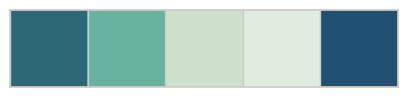

In [38]:
# Let's select a color pallete to use for our visualizations
colpal = ['#2C6975', '#68B2A0','#CDE0C9', '#E0ECDE', '#205072' ] # Assigning color codes
# Set the custom color palette
set_palette(colpal)

sns.palplot(colpal) # This will plot the colors 

### Now to see what unique values are contained in some of the columns. This is possible because the data set is small. This may not be feasible with a large data set.

In [39]:
# Species Values
unique_species = sorted(df['Species'].unique())
unique_species

['DOG']

In [40]:
# Gender Values
unique_genders = sorted(df['Gender'].unique())
unique_genders

['F', 'M', 'U']

In [41]:
# Spayed or Neutered?
unique_spayed = sorted(df['SpayNeuter'].unique())
unique_spayed

['N', 'Y']

In [42]:
# Listing of neighborhoods/boroughs
unique_borgh = sorted(df['Borough'].unique())
unique_borgh

['Bronx', 'Brooklyn', 'Manhattan', 'Other', 'Queens', 'Staten Island']

In [43]:
# Years within the data frame
unique_year = sorted(df['BiteYear'].unique())
unique_year

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [44]:
# Months within the data frame
unique_month = sorted(df['BiteMonth'].unique())
unique_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [45]:
# Now to remove the NaN/-1 values
unique_age = sorted([age for age in df['Age'].unique() if age != -1])
print(unique_age)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]


In [46]:
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,1,2018-01-01,DOG,Mixed Breed,0,U,N,Brooklyn,11220,1,2018
2,3,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,4,2018-01-08,DOG,Mixed Breed,4,M,N,Brooklyn,11231,1,2018
4,5,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
5,6,2018-01-03,DOG,Basenji,4,M,N,Brooklyn,11231,1,2018


#### Now the table and values look uniform

# **Visualization, Metrics and Trends**

#### Let's get a visual on the gender breakdown

In [47]:
# Count the occurrences of 'M' (males) in the 'Gender' column
male_count = df['Gender'].value_counts()["M"]
print(f"Number of Male dogs: {male_count}")

# Count the occurrences of 'F' (females) in the 'Gender' column
female_count = df['Gender'].value_counts()["F"]
print(f"Number of Female dogs: {female_count}")

# Count the occurrences of 'U' (unknowns) in the 'Gender' column
unknwn_count = df['Gender'].value_counts()["U"]
print(f"Number of dogs with gender Unknown: {unknwn_count}")

Number of Male dogs: 4964
Number of Female dogs: 1928
Number of dogs with gender Unknown: 3879


#### The following will return a Pie Chart with percentages and a Bar Chart with totals side by side.

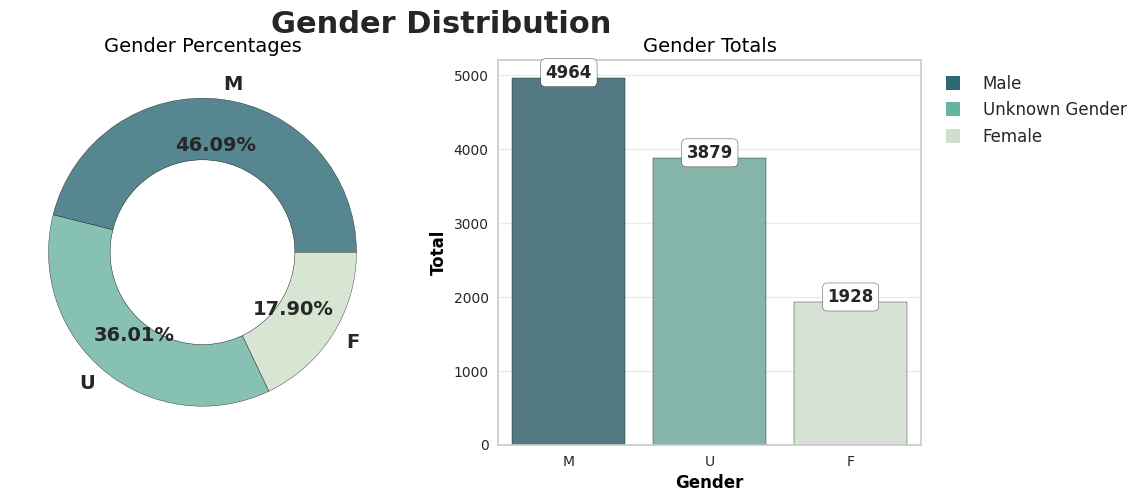

In [48]:
# --- Setting Colors, Labels, Order ---
colors=colpal
labels=['M', 'U', 'F']
order=df['Gender'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(12, 5))
plt.suptitle('Gender Distribution', fontweight='bold', 
             fontsize='22', fontfamily='sans-serif')

# Pie Chart that contains percentages
plt.subplot(1, 2, 1)
#Styling the title for pie chart
plt.title('Gender Percentages', fontweight='medium', fontsize=14,
          fontfamily='sans-serif', color="black")

# Now to add plot values
plt.pie(df['Gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor="black"),
        textprops={'fontsize':14, 'fontweight': 'bold'})

# Add center circle, this will create 'donut' pie chart effect
centre=plt.Circle((0, 0), 0.60, fc='white', edgecolor="black")
plt.gcf().gca().add_artist(centre)

# Histogram for actual gender totals
countplt = plt.subplot(1, 2, 2)
plt.title('Gender Totals', fontweight='medium', fontsize=14, 
          fontfamily='sans-serif', color="black")
ax = sns.countplot(x='Gender', data=df, palette=colors, order=order,
                   edgecolor="black", alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=12, fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
    
# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#2C6975', markersize=10, label='Male'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#68B2A0', markersize=10, label='Unknown Gender'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#CDE0C9', markersize=10, label='Female')
]

# Add legend outside of the chart
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)    
    

# Labeling
plt.xlabel('Gender', fontweight='bold', fontsize=12, fontfamily='sans-serif', 
           color="black")
plt.ylabel('Total', fontweight='bold', fontsize=12, fontfamily='sans-serif', 
           color="black")
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt
plt.show()

## <i>What are the Spay/Neuter numbers like?</i>

In [49]:
# Total dogs that have been spayed/neuter
sn_count = df['SpayNeuter'].value_counts()[1]
print(f"Number of dogs that have been fixed: {sn_count}")

Number of dogs that have been fixed: 3153


In [50]:
# Calculate the percentage of dogs that have been fixed/neutered
total_dogs = len(df) # Gets the number of dogs
fixeddogs = (df['SpayNeuter'] == 'Y').sum() # Sums the neutered totals
notfixed = total_dogs - fixeddogs  # Calculation to subtract total number of dogs from those that are fixed

In [51]:
# Print the findings
print(f"Total number of dogs: {total_dogs}")
print(f"Number of dogs that have been Spayed/Neutered: {fixeddogs}")
print(f"Number of dogs NOT Spayed/Neautered:{ notfixed}")

Total number of dogs: 10771
Number of dogs that have been Spayed/Neutered: 3153
Number of dogs NOT Spayed/Neautered:7618


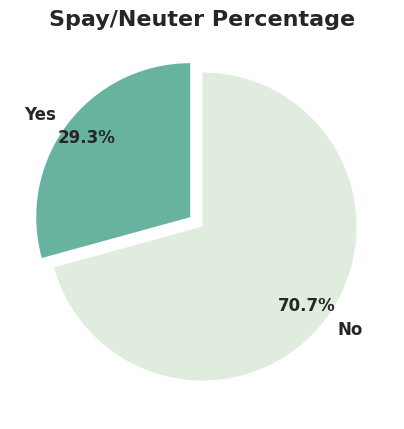

In [52]:
# Create a donut chart for the overall fixed/neutered percentage

# Specify how much to explode each slice
explode = (0.1, 0)  # Explode the first slice by 10%

# Specify colors for each section
colors_pie = ['#68B2A0', '#E0ECDE']

# Create the pie chart with the explode and colors parameters
plt.figure(figsize=(5, 5))
plt.pie([fixeddogs, notfixed], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, colors=colors_pie, textprops={'fontsize': 12, 'fontweight': 'bold'})
fig = plt.gcf()
plt.title('Spay/Neuter Percentage', fontweight='bold', fontsize='16', fontfamily='sans-serif')
plt.show()

#### Such a small percentage of dogs have been spayed/neutered.

In [53]:
# How many male dogs have NOT been neutered?
count_nfixed_males = df[(df['Gender'] == 'M') & (df['SpayNeuter'] == 'N')].shape[0]

# Print or use the count as needed
count_nfixed_males


2778

#### 2778 Males dogs remain un-neutered.

#### Would like to have a visual on percentage of fixed/not fixed based on gender. 

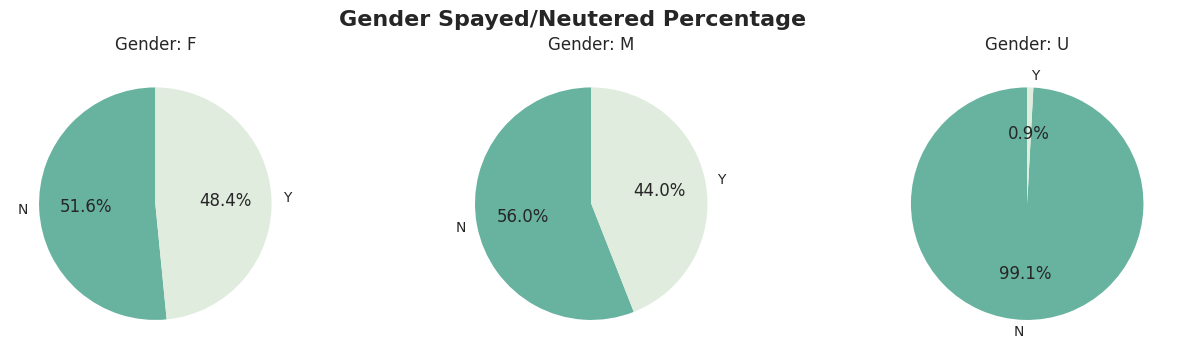

In [54]:
import matplotlib.pyplot as plt

# Specify colors for each section
colors_pie2 = ['#68B2A0', '#E0ECDE']

# Assuming your DataFrame is named df
gender_groups = df.groupby(['Gender', 'SpayNeuter']).size().unstack()

# Create a fixed number of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# Plot pie charts for each gender
for i, (gender, values) in enumerate(gender_groups.iterrows()):
    ax = axes[i]
    ax.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors_pie2)
    ax.set_title(f'Gender: {gender}')
    
# Add a title to the trio of pie charts
fig.suptitle('Gender Spayed/Neutered Percentage', fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.5)  # Adjust the horizontal space between subplots

plt.show()


#### If gender is unknown...then how are 0.9% Spayed/Neutered?  
<i>The 'Yes' percentage for the 'Unknown' gender could be due to error. The 0.9% could be removed from analysis. </i>
<p></p>

#### The percentages are about even between male/female dogs.

## <i>Bites by Gender?</i>

In [55]:
bites_per_gender = df.groupby('Gender').size().reset_index(name='num_bites')
bites_per_gender

,Gender,num_bites
0,F,1928
1,M,4964
2,U,3879


#### Males are more prone to bitting making up almost half of the bite cases.

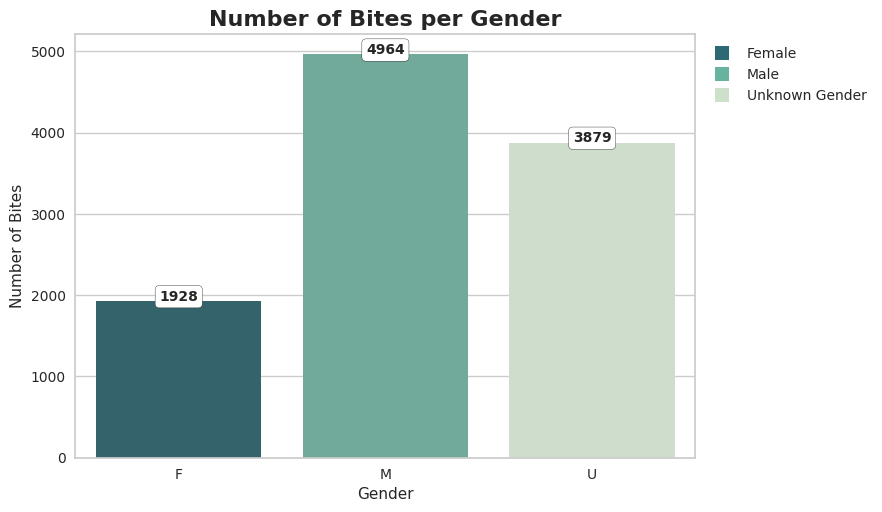

In [56]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='Gender', y='num_bites', data=bites_per_gender)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Bites')
plt.title('Number of Bites per Gender', fontweight='bold', fontsize='16', fontfamily='sans-serif')

# Adding values on top of the bars
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=10, fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
# Create custom legend
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#2C6975', markersize=10, label='Female'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#68B2A0', markersize=10, label='Male'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='#CDE0C9', markersize=10, label='Unknown Gender')
]

# Add legend outside of the chart
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Display the bar chart
plt.show()

## Age Breakdown

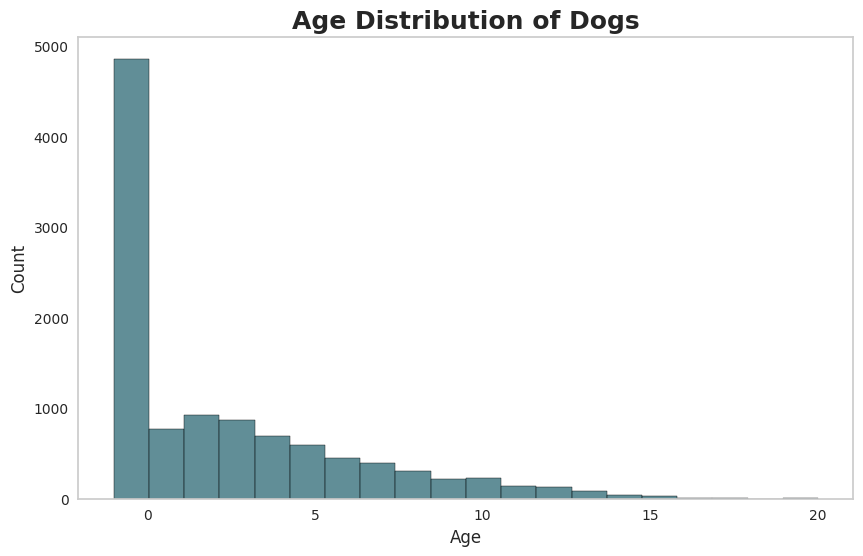

In [57]:
plt.figure(figsize=(10, 6))
p = sns.histplot(df['Age'], bins=20,fill=True)  

# Adding titles and labels
plt.title('Age Distribution of Dogs', fontweight='bold', 
             fontsize='18', fontfamily='sans-serif')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.grid(visible=False)

# Displaying the plot
plt.show()

#### Most dogs ages are unknown.  It's why the records with 'null'/'unknown' for the Age variable were kept; It's not uncommon for a dog to run off after an attack or for the dog to be unknown to the person bit but the record is still valid so 0 age value were kept. 

# <b>Geographic Metrics</b>

## Dog Bites by Borough?

In [58]:
# Group boroughs and determine the number of bites
dogs_by_borough = df.groupby('Borough').size().reset_index(name='num_bites')
dogs_by_borough

,Borough,num_bites
0,Bronx,1779
1,Brooklyn,2514
2,Manhattan,2210
3,Other,319
4,Queens,3147
5,Staten Island,802


#### 'Other' are incidences that occured outside of the NYC boroughs.

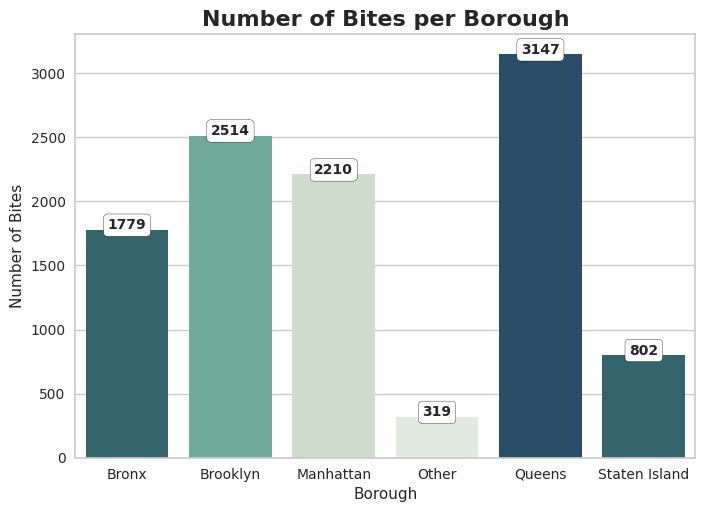

In [59]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='Borough', y='num_bites', data=dogs_by_borough, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Bites')
plt.title('Number of Bites per Borough', fontsize = 16, fontweight ='bold')

# Adding values on top of the bars
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=10,fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
    

# Display the bar chart
plt.show()

## Number of Spayed/Neutered dogs per Borough?

In [60]:
# Group by 'Neighborhood' and count the occurrences of 'Y' and 'N' in 'Spayed' column
spayed_counts = df.groupby('Borough')['SpayNeuter'].value_counts().unstack().fillna(0)
spayed_counts

SpayNeuter,N,Y
Borough,,
Bronx,1522,257
Brooklyn,1885,629
Manhattan,1364,846
Other,186,133
Queens,2114,1033
Staten Island,547,255


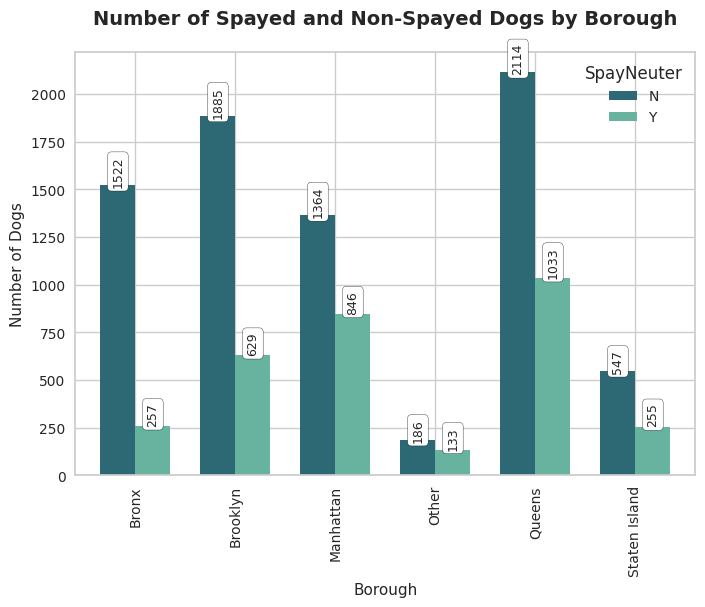

In [61]:
# Group by 'Neighborhood' and count the occurrences of 'Y' and 'N' in 'Spayed' column
spayed_counts = df.groupby('Borough')['SpayNeuter'].value_counts().unstack().fillna(0)

# Plotting a side-by-side bar chart
ax = spayed_counts.plot(kind='bar', stacked=False, width=0.7)


 # Adding values on top of the bars
for rect in ax.patches[:len(spayed_counts['Y'])]:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=9,rotation=90,
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))     
    
# Add data labels on top of the bars for 'N'
for bar in ax.patches[len(spayed_counts['N']):]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, round(yval, 2), ha='center', va='bottom',
             rotation=90, fontsize=9, bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 


# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Number of Spayed and Non-Spayed Dogs by Borough', pad=20, fontsize = 14, fontweight ='bold')

# Display the bar chart
plt.show()
    

## Dog Genders Based on Borough?

In [62]:
# Group by 'Neighborhood' and count the occurrences of each gender
gender_counts = df.groupby('Borough')['Gender'].value_counts().unstack().fillna(0)
gender_counts

Gender,F,M,U
Borough,,,
Bronx,316,753,710
Brooklyn,384,1012,1118
Manhattan,452,1122,636
Other,69,181,69
Queens,549,1520,1078
Staten Island,158,376,268


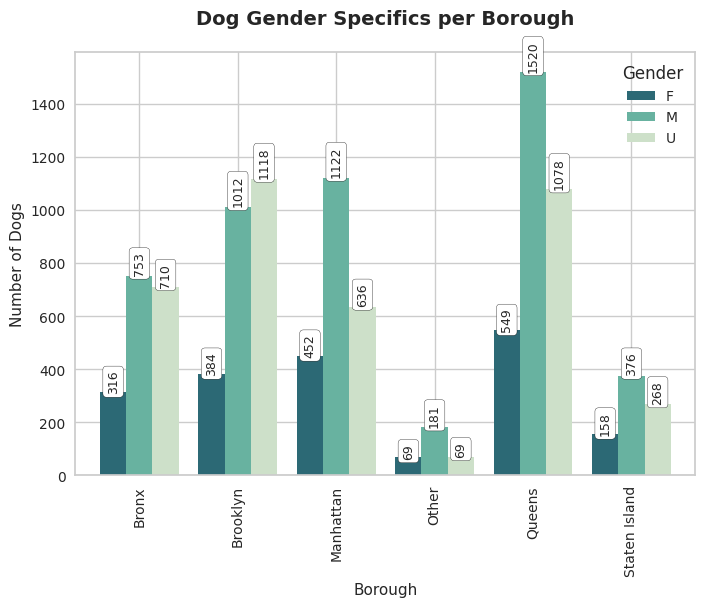

In [63]:
# Plotting a stacked bar chart
ax = gender_counts.plot(kind='bar', stacked=False, width=.8)

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
plt.title('Dog Gender Specifics per Borough', pad=20, fontsize = 14, fontweight ='bold')  
    
# Adding values on top of the bars
for rect in ax.patches[:len(gender_counts['F'])]:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=9,rotation=90,
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))     
    
# Add data labels on top of the bars for 'N'
for bar in ax.patches[len(gender_counts['M']):]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+1, round(yval, 2), ha='center', va='bottom',
             rotation=90, fontsize=9, bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 

# Display the bar chart
plt.show()

## Highest bites per Borough based on type of Breed?

In [64]:
grouped = df.groupby(['Borough', 'Breed']).size().reset_index(name='Count')

# Sort the results and drop duplicates to get the most popular breed in each Borough
most_popular_breed_by_borough = grouped.sort_values(['Borough', 'Count'], ascending=[True, False]).drop_duplicates('Borough')

# Reset the index for better readability
most_popular_breed_by_borough.reset_index(drop=True, inplace=True)
most_popular_breed_by_borough

,Borough,Breed,Count
0,Bronx,Pit Bull,520
1,Brooklyn,Mixed Breed,688
2,Manhattan,Mixed Breed,618
3,Other,Mixed Breed,83
4,Queens,Mixed Breed,723
5,Staten Island,Pit Bull,185


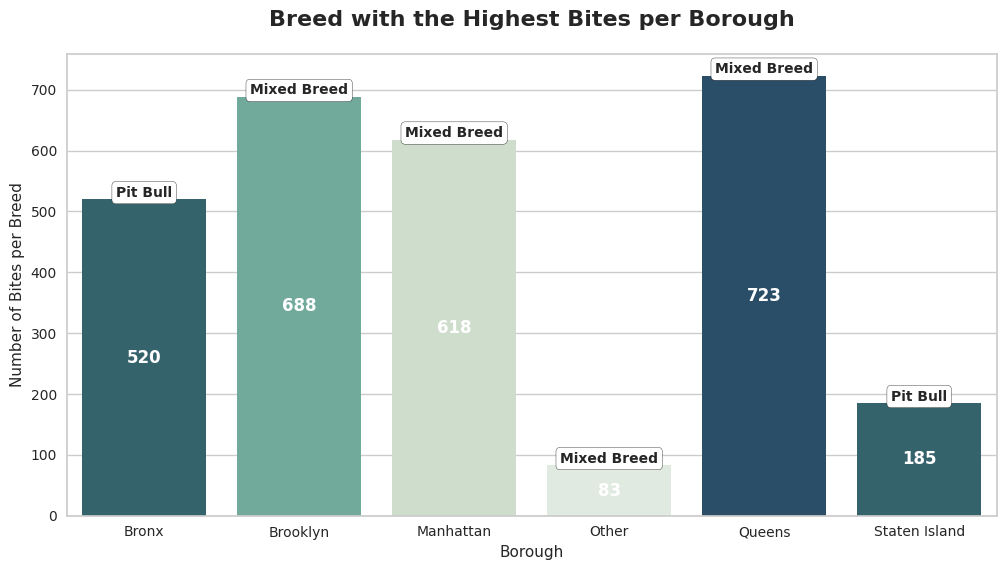

In [65]:
# Plotting the Seaborn bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Borough', y='Count', data=most_popular_breed_by_borough, palette=colpal)

# Adding breed names and total values on top of the bars
for i, rect in enumerate(ax.patches):
    breed_name = most_popular_breed_by_borough['Breed'].iloc[i]
    total_value = most_popular_breed_by_borough['Count'].iloc[i]
    
    # Adding breed names
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, breed_name,
            horizontalalignment='center', fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor="black",
                      linewidth=0.25, boxstyle='round'))
    
    # Adding total values in white
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() / 2, f'{total_value}',
            color='white', ha='center', va='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Bites per Breed')
plt.title('Breed with the Highest Bites per Borough', pad=20,fontsize=16, fontweight='bold')

# Display the bar chart
plt.show()

#### Mixed breeds and pit bull top the lists with the highest rates of bites.

## Top 20 Dog Breeds for Bites

In [66]:
# Group by 'Breed' and calculate the size
breed_grps = df.groupby('Breed').size().reset_index(name='num_dogs_breed')

# Sort the DataFrame by 'num_dogs_breed' in descending order
breed_grps = breed_grps.sort_values(by='num_dogs_breed', ascending=False)

# Display the top 20 rows
top_20_breeds = breed_grps.head(20)
top_20_breeds

,Breed,num_dogs_breed
1,Mixed Breed,2730
91,Pit Bull,2017
8,Pit Bull Mix,597
112,Shih Tzu,382
66,German Shepherd,356
0,Terrier,346
50,Chihuahua,310
78,Labrador Mix,293
2,Bull Dog,291
116,Yorkie,258


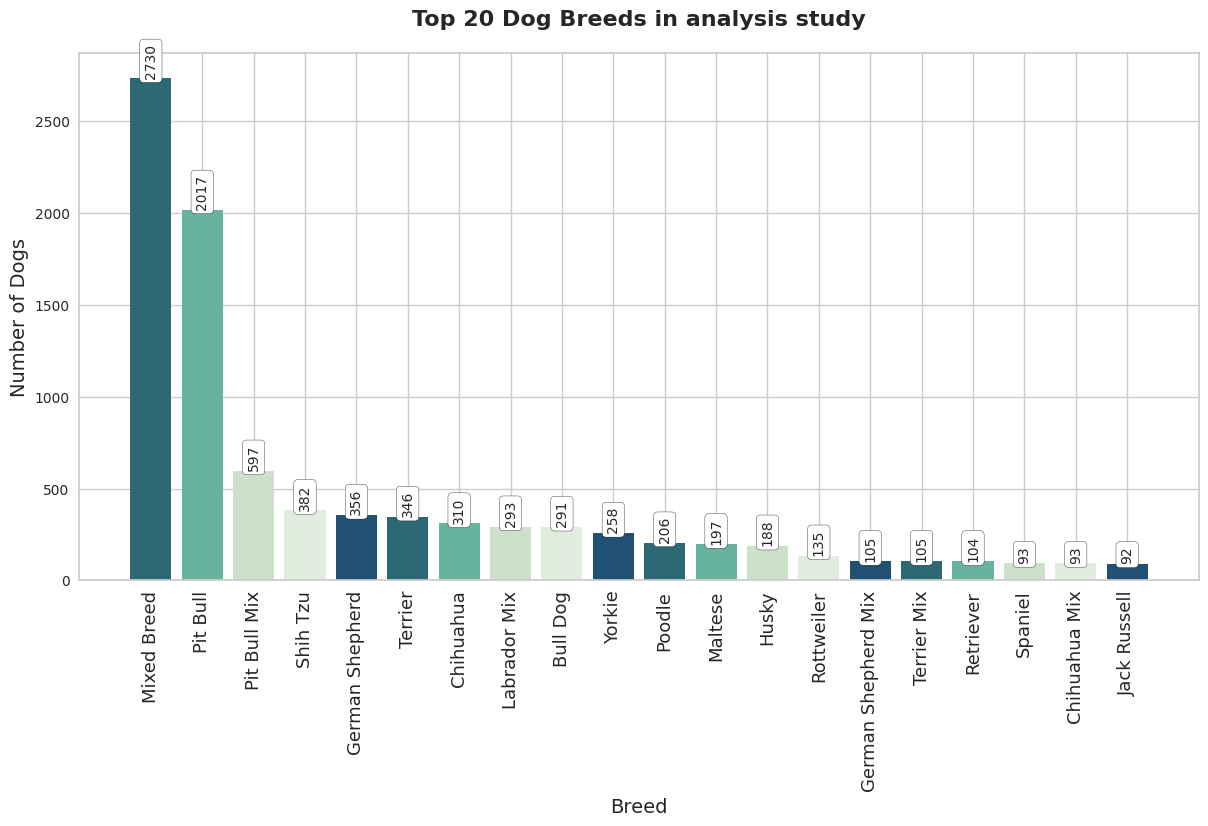

In [67]:
# Create a bar chart using matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_breeds['Breed'], top_20_breeds['num_dogs_breed'], color=colpal)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+.5, round(yval, 2), ha='center', va='bottom',
             rotation=90, horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round')) 
        
# Adjust text size and visibility
plt.tight_layout()
plt.xticks(rotation=90, ha='center', fontsize = 13)
plt.xlabel('Breed', fontsize = 14)
plt.ylabel('Number of Dogs', fontsize = 14)
plt.title('Top 20 Dog Breeds in analysis study',pad=20, fontsize = 16, fontweight ='bold')

# Show the bar chart
plt.show()

# Bites based on Year/Month

In [68]:
# Visual on table so do not have to scroll to the top
df.head()

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,BiteMonth,BiteYear
0,1,2018-01-01,DOG,Mixed Breed,0,U,N,Brooklyn,11220,1,2018
2,3,2018-01-06,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
3,4,2018-01-08,DOG,Mixed Breed,4,M,N,Brooklyn,11231,1,2018
4,5,2018-01-09,DOG,Pit Bull,0,U,N,Brooklyn,11224,1,2018
5,6,2018-01-03,DOG,Basenji,4,M,N,Brooklyn,11231,1,2018


## Yearly Insights

In [69]:
# Bites by years
# Group boroughs and determine the number of bites
db_years = df.groupby('BiteYear').size().reset_index(name='num_bites')
db_years

,BiteYear,num_bites
0,2015,612
1,2016,706
2,2017,593
3,2018,2541
4,2019,2567
5,2020,1794
6,2021,1958


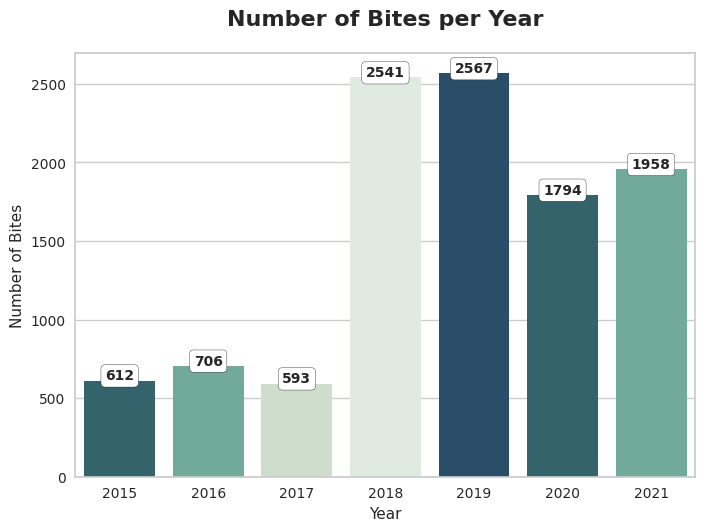

In [70]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='BiteYear', y='num_bites', data=db_years, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Year')  # Labels the x-axis
plt.ylabel('Number of Bites')  # Labels the y-axis
plt.title('Number of Bites per Year', fontsize = 16, fontweight ='bold', pad=20)  # Labels and formats the title

# Adding values on top of the bars
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height() + 4.25,f'{int(rect.get_height())}', 
             horizontalalignment='center', fontsize=10,fontweight='bold', 
             bbox=dict(facecolor='white', edgecolor="black", 
                       linewidth=0.25, boxstyle='round'))
# Display the bar chart
plt.show()

#### 2018 is when the numbers take off. More research needed into why that is.  Did something change in the collection for data? Where more areas targeted for the study?

## Monthly Insights

In [71]:
# Which months have the highest bites?
# Bites by years
# Group boroughs and determine the number of bites
db_months = df.groupby('BiteMonth').size().reset_index(name='num_bites')
db_months

,BiteMonth,num_bites
0,1,707
1,2,758
2,3,804
3,4,882
4,5,983
5,6,1135
6,7,1110
7,8,1056
8,9,912
9,10,872


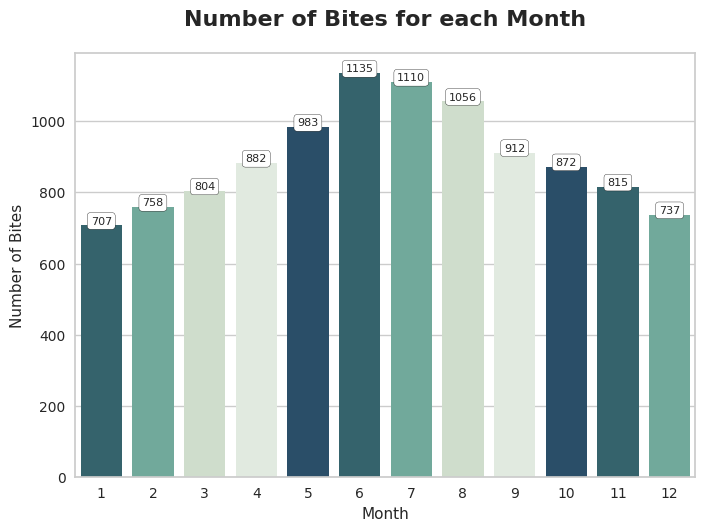

In [72]:
# Plotting the Seaborn bar chart
ax = sns.barplot(x='BiteMonth', y='num_bites', data=db_months, palette=colpal)#palette for custom colors

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Bites')
plt.title('Number of Bites for each Month', fontsize = 16, fontweight ='bold', pad=20)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 4.25, f'{int(rect.get_height())}',  # Use formatted string to remove decimal point
            horizontalalignment='center', fontsize=8,
            bbox=dict(facecolor='white', edgecolor="black", linewidth=0.25, boxstyle='round')) 
    
# Display the bar chart
plt.show()

#### The above bar chart shows the values for all years by month.  Bites have shown their peak for the summer months (May(5) through August(8)).  Numbers appear to trend according to popular times for outdoor activites.

In [73]:
# Bites by months
# Group boroughs and determine the number of bites
db_month_yr = df.groupby(['BiteYear', 'BiteMonth']).size().reset_index(name='num_bites')
db_month_yr

,BiteYear,BiteMonth,num_bites
0,2015,1,30
1,2015,2,36
2,2015,3,43
3,2015,4,47
4,2015,5,56
...,...,...,...
79,2021,8,202
80,2021,9,127
81,2021,10,152
82,2021,11,173


### How do the bite rate correlate to the years?

In [74]:
# Creating a pivot table from the year and monthly bite data
dbpivot=db_month_yr.pivot_table(
    index='BiteYear',    # Rows will be indexed by 'BiteYear'
    columns='BiteMonth', # Columns will be created based on 'BiteMonth'
    values='num_bites',  # Values to be aggregated in the pivot table
    aggfunc='sum'
).cumsum(axis=1)         # cumulative value

dbpivot # displays output

BiteMonth,1,2,3,4,5,6,7,8,9,10,11,12
BiteYear,,,,,,,,,,,,
2015,30,66,109,156,212,264,322,400,457,510,556,612
2016,47,105,149,220,289,378,465,525,574,622,660,706
2017,28,64,120,177,229,292,350,411,469,510,552,593
2018,173,331,538,727,958,1251,1537,1788,2016,2203,2385,2541
2019,163,341,511,756,1018,1289,1531,1757,1982,2204,2396,2567
2020,167,333,462,545,670,824,1002,1180,1348,1517,1659,1794
2021,99,225,380,570,758,971,1172,1374,1501,1653,1826,1958


### Let's turn this into a pivot table and heatmap to see a better correlation

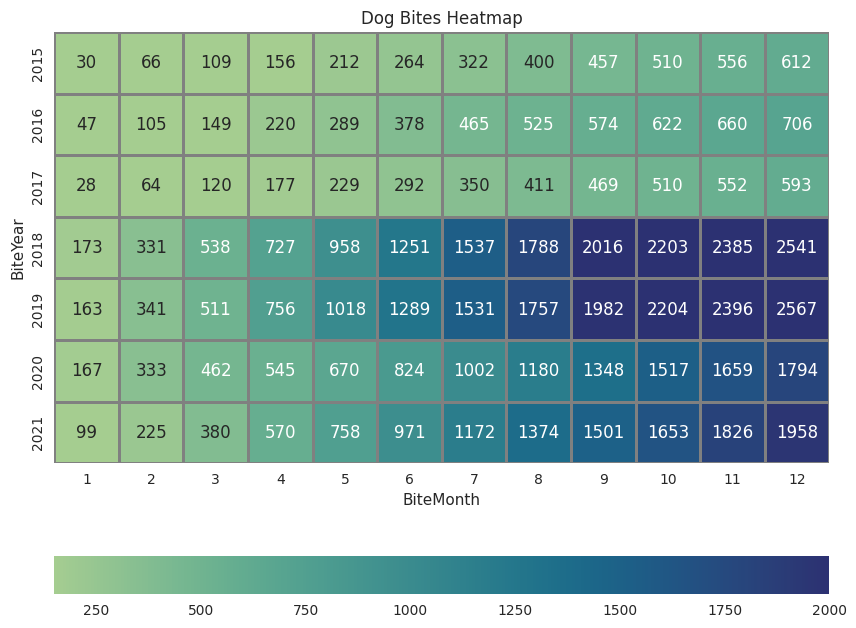

In [75]:
# Setting up the figure size
plt.figure(figsize=(10,8))

# Creating a heatmap
sns.heatmap(
    dbpivot,                # The DataFrame to be visualized
    annot=True,             # Displaying the data values on the heatmap
    linewidths=1,           # Width of the lines between cells
    cmap="crest",           # Color map for the heatmap
    linecolor='grey',       # Color of the lines separating cells
    fmt='.0f',              # Format for annotating the cells (0 decimal places)
    vmax=2000,              # Maximum value for color scale
    vmin=150,               # Minimum value for color scale
    cbar_kws={'orientation': 'horizontal'}  # Configuration for color bar orientation
).set(title='Dog Bites Heatmap')  # Setting the title of the plot

plt.show()

### Borough vs Year

In [76]:
# Borough vs Year
# Group boroughs and determine the number of bites
bor_yr = df.groupby(['Borough', 'BiteYear']).size().reset_index(name='num_dogs')
bor_yr

,Borough,BiteYear,num_dogs
0,Bronx,2015,72
1,Bronx,2016,111
2,Bronx,2017,119
3,Bronx,2018,448
4,Bronx,2019,442
5,Bronx,2020,275
6,Bronx,2021,312
7,Brooklyn,2015,101
8,Brooklyn,2016,138
9,Brooklyn,2017,82


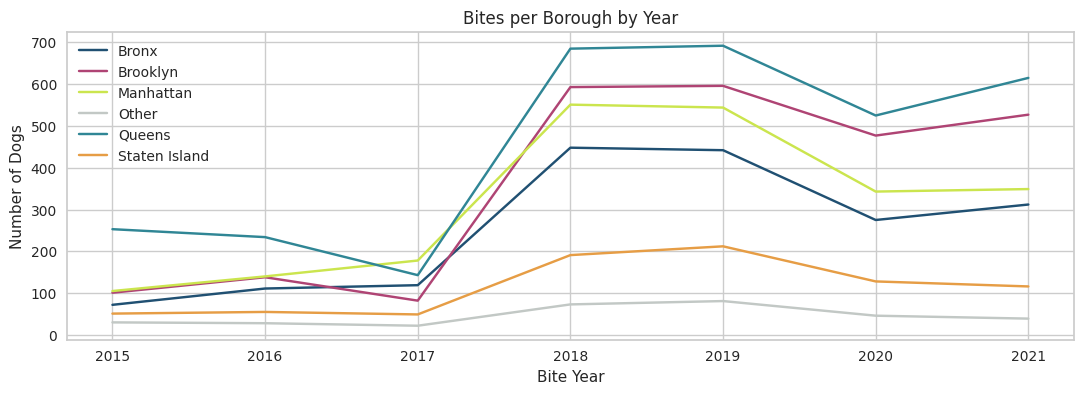

In [82]:
# Group data by Borough
borough_groups = bor_yr.groupby('Borough')

# Define a list of colors for each borough
borough_colors = {'Bronx': '#205072', 'Brooklyn': '#AF4474', 'Manhattan': '#CBE54E', 'Queens': '#308695', 'Staten Island': '#E69D45', 'Other':'#C2C8C5'}

# Plot dynamics for each borough with assigned colors
plt.figure(figsize=(13, 4))
for borough, group in borough_groups:
    plt.plot(group['BiteYear'], group['num_dogs'], label=borough, color=borough_colors[borough])

# Add labels and title
plt.xlabel('Bite Year')
plt.ylabel('Number of Dogs')
plt.title('Bites per Borough by Year')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Let's make the above graph interactive. 
It would have been crowed and confusing to add labels for all of the point totals in the static line chart above.  Below I'll recreate the line graph into one that will display the point totals when hovering over them. 

In [78]:
# Group data by Borough
borough_groups = bor_yr.groupby('Borough')

# Define a list of colors for each borough
borough_colors = {'Bronx': '#205072', 'Brooklyn': '#AF4474', 'Manhattan': '#CBE54E', 'Queens': '#308695', 'Staten Island': '#E69D45', 'Other':'#C2C8C5'}

# Create an interactive line chart using Plotly Express
fig = px.line()
for borough, group in borough_groups:
    fig.add_scatter(x=group['BiteYear'], y=group['num_dogs'], mode='lines', name=borough, line=dict(color=borough_colors[borough]))

# Customize layout
fig.update_layout(
    xaxis_title='Bite Year',
    yaxis_title='Number of Dogs',
    title='Interactive Borough by Year Chart',
    legend_title='Borough'
)

# Show the interactive plot
fig.show()


#### Added custom colors as original color palette was hard to see as line plot

In [79]:
# Export DataFrame to a CSV file - file is deactivated to prevent repeated downloads.
#df.to_csv('NY_DogBites_Cleaned.csv', index=False)  # Set index=False to exclude row numbers in the CSV file